# <center><span style="font-size:100px ; color:red">Projet 10:</span> </center>

#  <center><span style="font-size:50px ; color:"> Détectez des faux billets avec <span style="font-size:50px ; color:red">R</span> ou <span style="font-size:50px ; color:red">Python</span></center>

## <center><span style="font-size:50px ; color:">Sommaire:</span></center>

**I/ Préparation de l'environnement et présentation des données**  
   I.1.	[Importation des librairies](#I.1.-Importation-des-libraries)   
   I.2.	[Importations des données](#I.2.-Importation-des-données)  

**II/ Analyse descriptive des données**  
   II.1. [Exploration des Données](#II.1.-Exploration-des-Données)  
   II.2. [Répartition des données](#II.2.-Répartition-des-données)  
   II.3. [Imputation des valeurs nulles (Regression linéaire)](#II.3.-Imputation-des-valeurs-nulles-(Regression-linéaire))   

**III/ Prédiction des Vrais-Faux billets**  
   III.1. [Importation des données](#III.1.-Importation-des-données)  
   III.2. [Régression logistique](#III.2.-Regresssion-logistique)  
   III.3. [K_Means](#III.3.-K_means)  
   III.4. [KNeighborsClassifier](#III.4.-KNeighborsClassifier)  
   III.5. [Comparaison des algorithmes](#III.5.-Comparaison-des-algorithmes)  

**IV/ Application au jeu de donnée final**    
   IV.1. [Application finale](#IV.1.-Application-finale)  

<span style="font-size:30px ; color:">**I/ Préparation de l'environnement et présentation des données**</span>

# I.1. Importation des libraries
[Sommaire](#Sommaire:)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cluster, metrics, preprocessing
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
from scipy import stats
from scipy.stats import t, shapiro, kstest
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# I.2. Importation des données
[Sommaire](#Sommaire:)

In [2]:
# Importation du fichier mis à notre disposition par l'ONCFM
data = pd.read_csv('billets.csv', sep=';')
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


<span style="font-size:30px ; color:">**II/ Analyse descriptive des données**</span>

# II.1. Exploration des Données
[Sommeire](#Sommaire:)

In [3]:
# Affichage du nombre de lignes et de colonnes
print('Le dataframe est composé de', data.shape[0], 'lignes et', data.shape[1], 'colonnes.')
data

Le dataframe est composé de 1500 lignes et 7 colonnes.


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [4]:
# On affiche les informations sur le dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


On remarque que la colonne 'margin_low' contient 37 valeurs nulles, On les récupère en appliquant une regression linéaire

**Traitement des doublons**

In [5]:
print('Il y a', data.duplicated().sum(),'doublons dans le dataframe.')

Il y a 0 doublons dans le dataframe.


**Outliers**

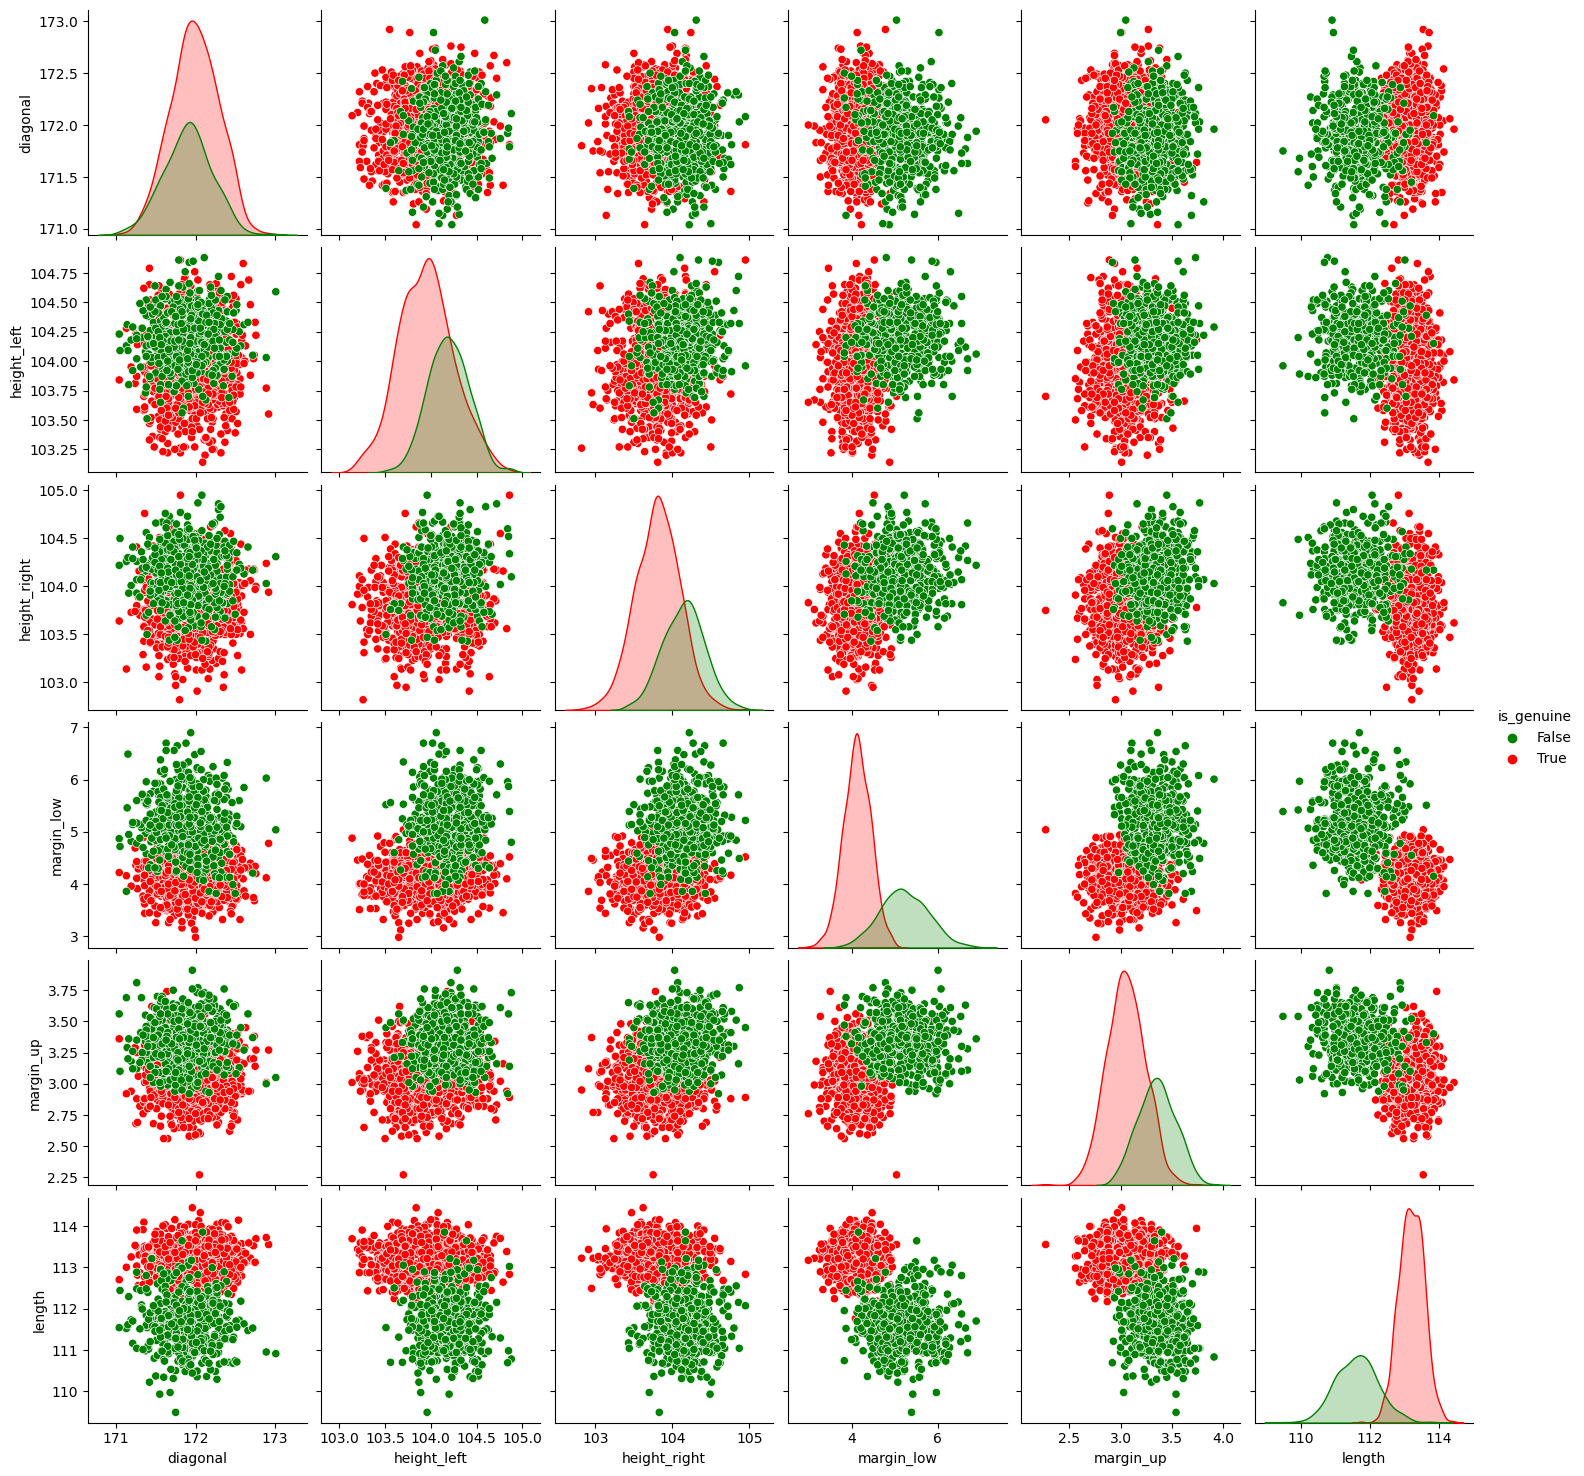

In [6]:
sns.pairplot(data=data, hue='is_genuine',palette={'red','green'})

In [7]:
# Distribution des données en boîte à moustaches
f, axes = plt.subplots(2,3,figsize = (25,20))
sns.boxplot(y='diagonal', x='is_genuine', data=data,ax=axes[0, 0],palette={'red','green'})
axes[0, 0].set_title('diagonal')
sns.boxplot(y='height_left', x='is_genuine', data=data,ax=axes[0, 1],palette={'red','green'})
axes[0, 1].set_title('height_left')
sns.boxplot(y='height_right', x='is_genuine', data=data,ax=axes[0, 2],palette={'red','green'})
axes[0, 2].set_title('height_right')
sns.boxplot(y='margin_low', x='is_genuine', data=data,ax=axes[1, 0],palette={'red','green'})
axes[1, 0].set_title('margin_low')
sns.boxplot(y='margin_up', x='is_genuine', data=data,ax=axes[1, 1],palette={'red','green'})
axes[1, 1].set_title('margin_up')
sns.boxplot(y='length', x='is_genuine', data=data,ax=axes[1, 2],palette={'red','green'})
axes[1, 2].set_title('length')

Text(0.5, 1.0, 'length')

# II.2. Répartition des données
[Sommaire](#Sommaire:)

On analyse les vrais et les faux billets séparément.

In [8]:
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


**Descriptions des vrais billets**

In [9]:
# Création du Dataframe des vrais billets
data_nvn = data.dropna()
data_nvn

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [10]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(2,3)
fig.suptitle('Histogramme des données')

sns.set(font_scale=1.5)
sns.histplot(ax=axes[0,0],data=data_nvn, x="diagonal")
sns.histplot(ax=axes[0,1],data=data_nvn, x="height_left")
sns.histplot(ax=axes[0,2],data=data_nvn, x="height_right")
sns.histplot(ax=axes[1,0],data=data_nvn, x="margin_low")
sns.histplot(ax=axes[1,1],data=data_nvn, x="margin_up")
sns.histplot(ax=axes[1,2],data=data_nvn, x="length")

plt.savefig('output.png')

**Corrélation des variables pour les données des vrais billets**

In [11]:
corr = data_nvn[data_nvn.columns.drop('is_genuine')].corr()
corr

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.018265,-0.019428,-0.111534,-0.059147,0.100758
height_left,0.018265,1.000000,0.235132,0.302643,0.243812,-0.314344
height_right,-0.019428,0.235132,1.000000,0.391085,0.306867,-0.404272
margin_low,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.059147,0.243812,0.306867,0.431606,1.000000,-0.521139
length,0.100758,-0.314344,-0.404272,-0.666753,-0.521139,1.000000


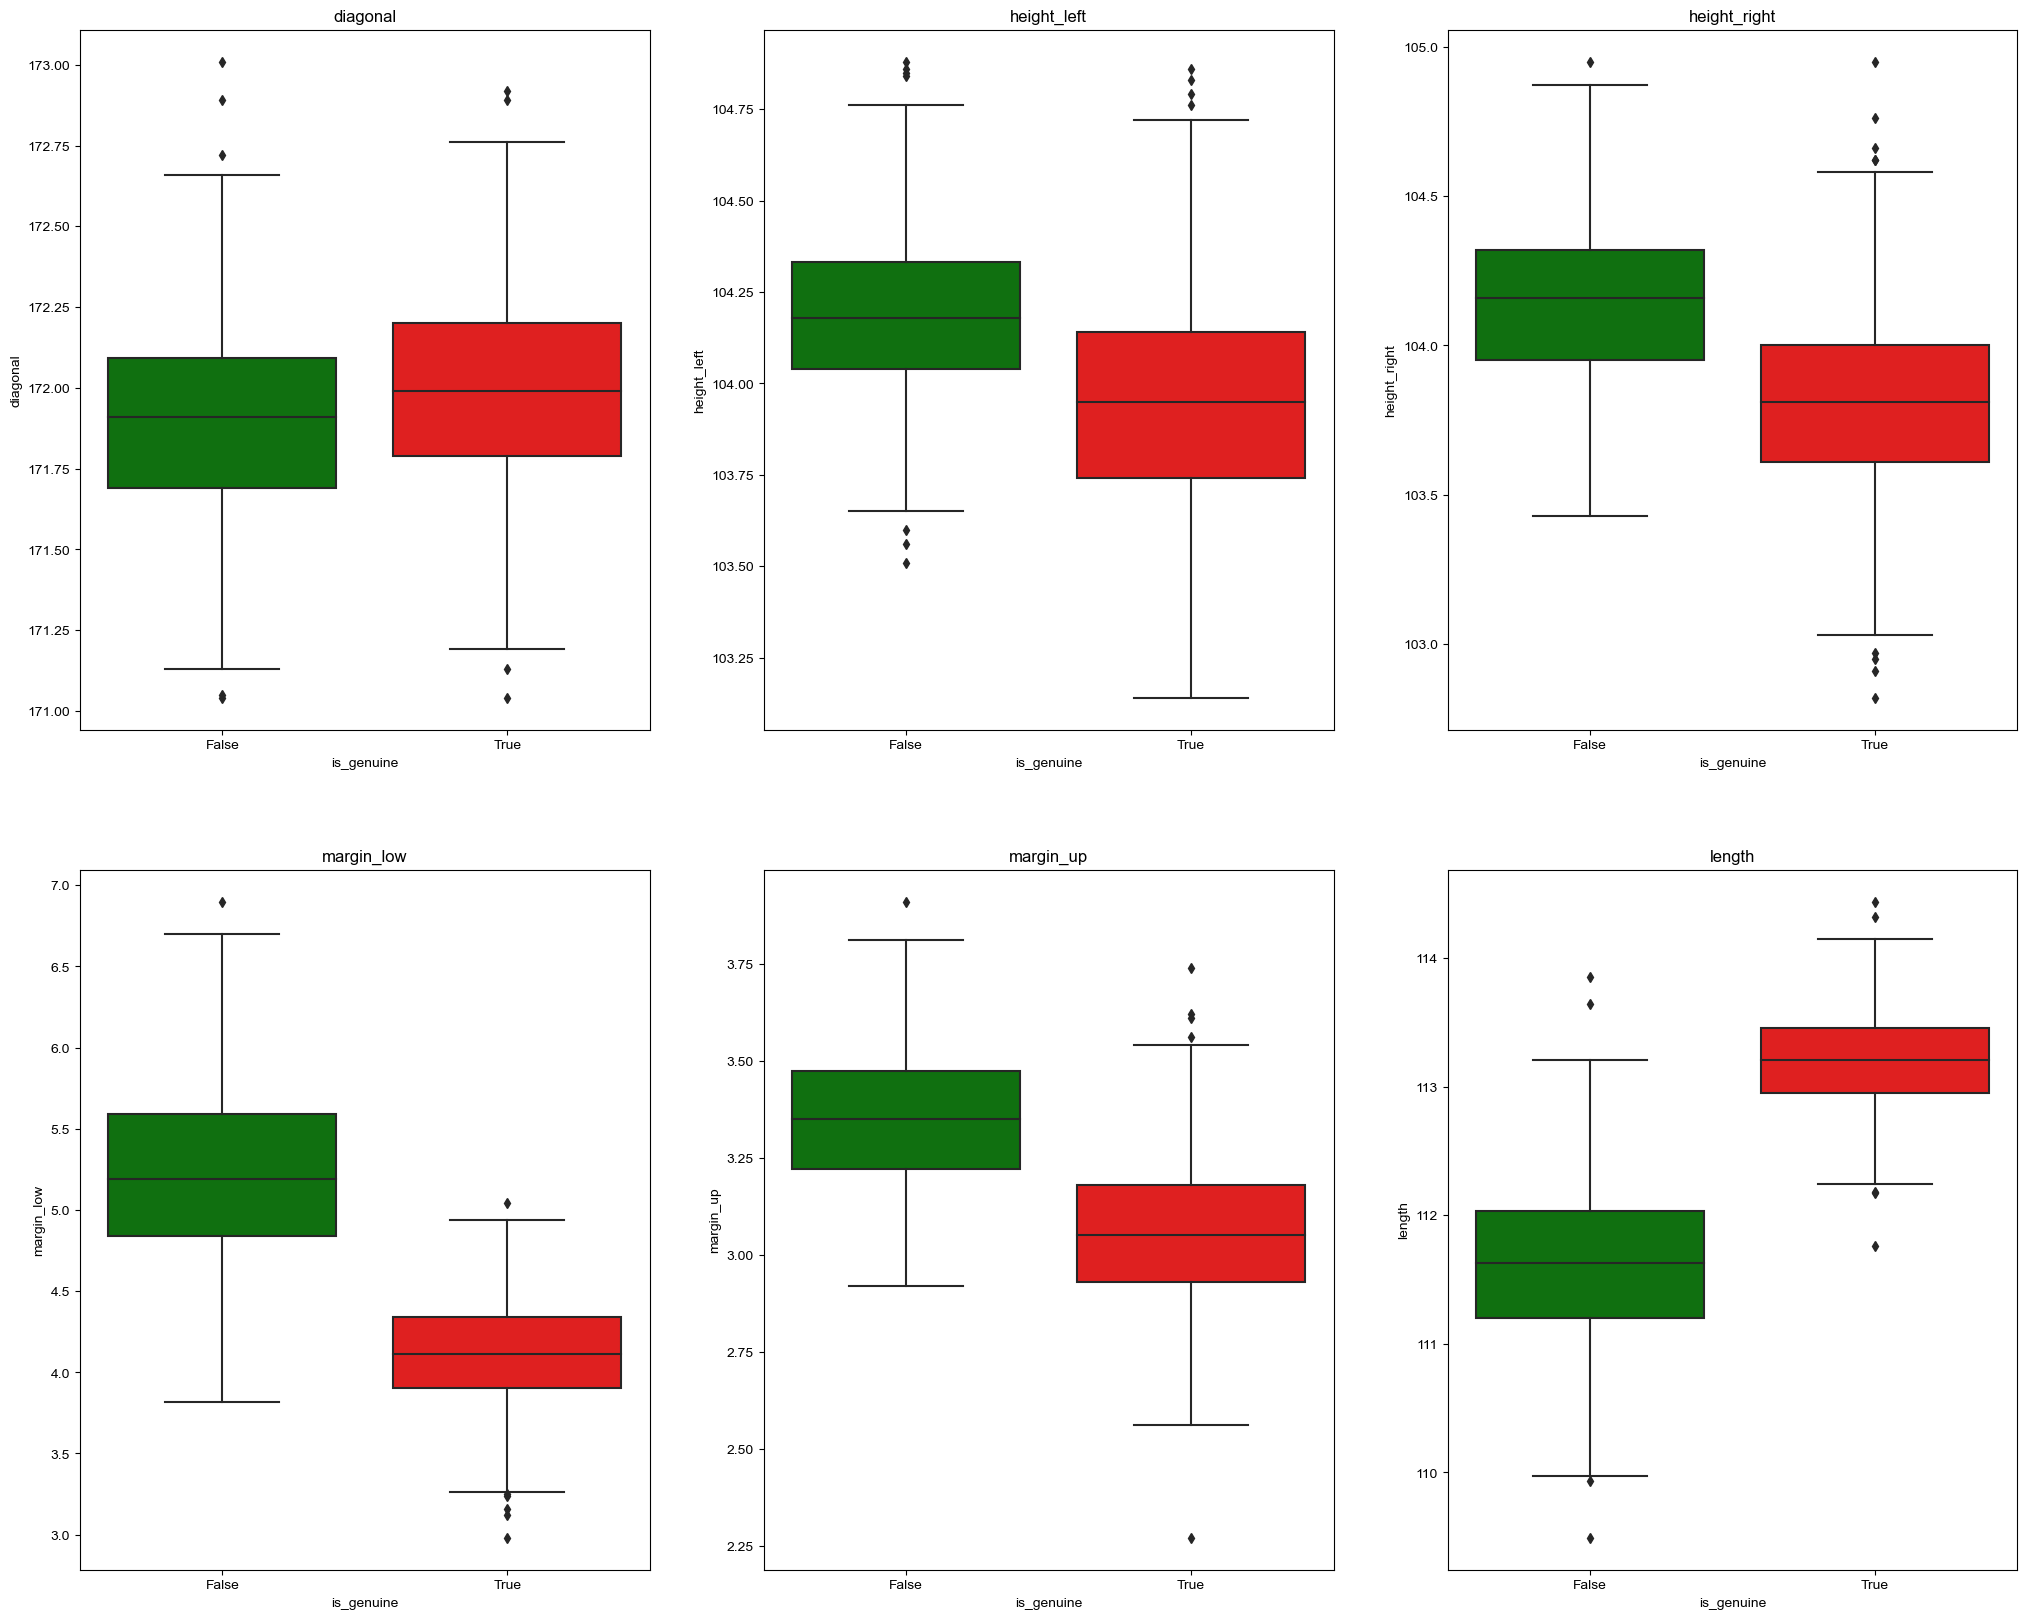

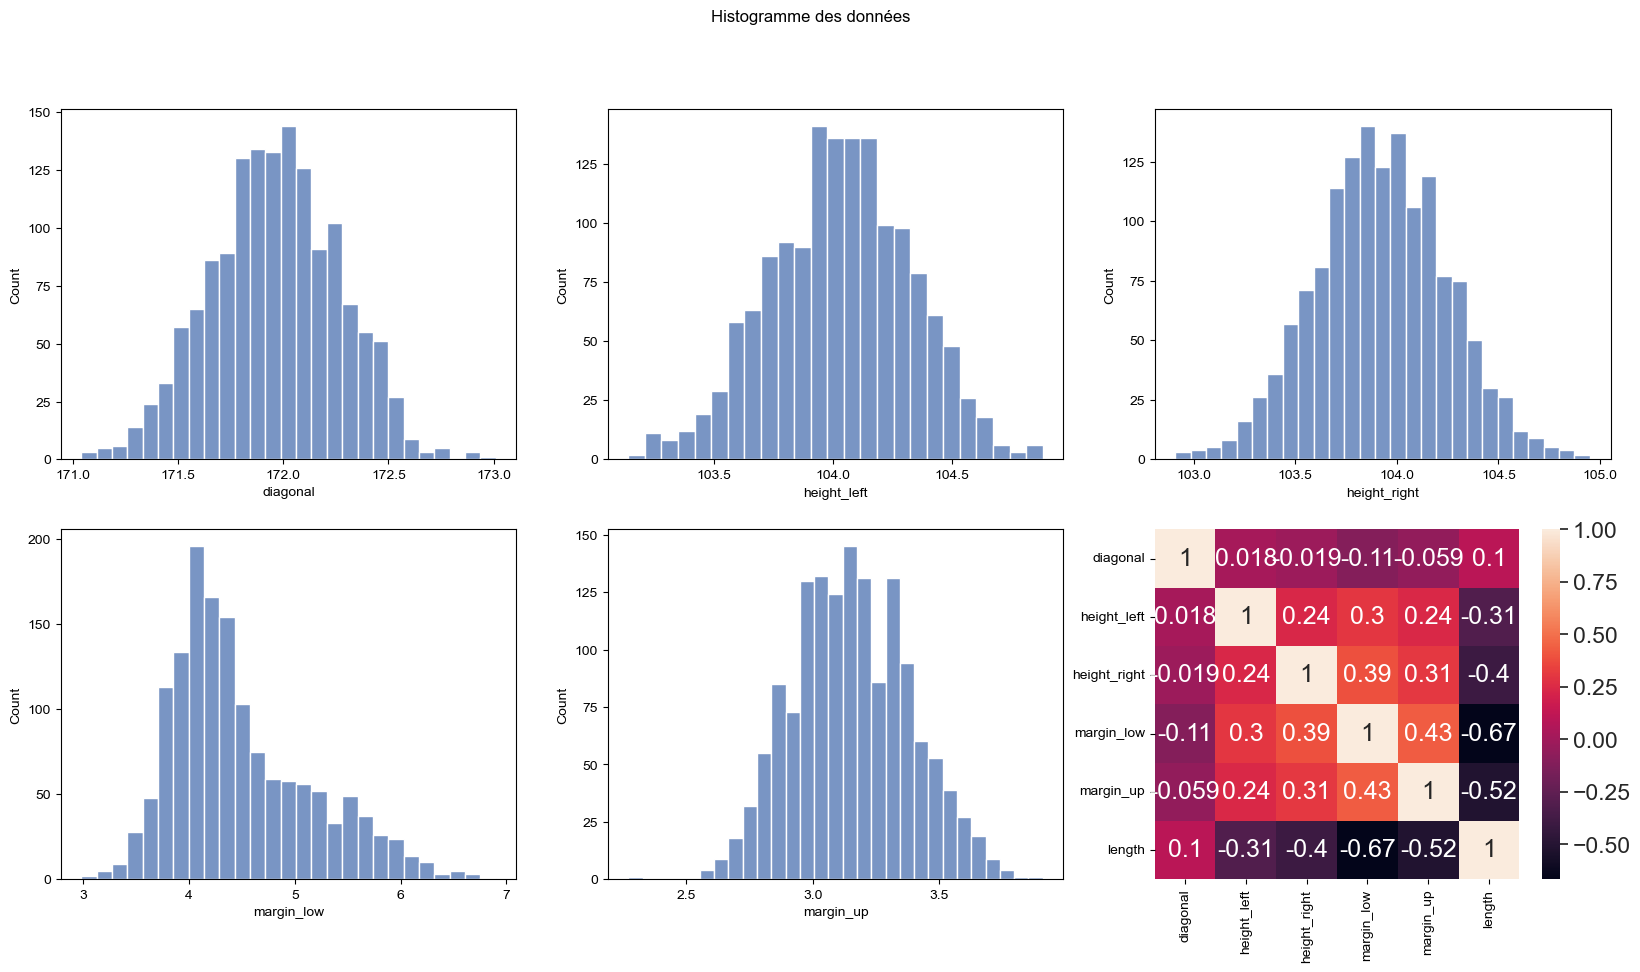

In [12]:
hm = sns.heatmap(corr, annot = True, color = 'red')
plt.show()

Il n'y a aucune corrélation significative entre les variables.

**Descriptions des faux billets**

In [13]:
round(data_nvn.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
diagonal,1463.0,171.96,0.31,171.04,171.75,171.96,172.17,173.01
height_left,1463.0,104.03,0.30,103.14,103.82,104.04,104.23,104.88
height_right,1463.0,103.92,0.32,102.91,103.71,103.92,104.15,104.95
margin_low,1463.0,4.49,0.66,2.98,4.01,4.31,4.87,6.90
margin_up,1463.0,3.15,0.23,2.27,2.99,3.14,3.32,3.91
length,1463.0,112.67,0.87,109.49,112.02,112.96,113.34,114.32


In [14]:
# # Création du Dataframe des faux billets
data_vn = data.loc[data['margin_low'].isnull()]
data_vn

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [15]:
round(data_vn.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
diagonal,37.0,171.93,0.30,171.37,171.80,171.93,172.07,172.66
height_left,37.0,103.96,0.29,103.26,103.72,103.95,104.15,104.49
height_right,37.0,103.87,0.38,102.82,103.62,103.86,104.12,104.66
margin_low,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
margin_up,37.0,3.09,0.24,2.56,2.99,3.07,3.23,3.62
length,37.0,112.83,0.85,110.31,112.41,112.95,113.35,114.44


In [16]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(2,3)
fig.suptitle('Histogramme des données')

sns.set(font_scale=1.5)
sns.histplot(ax=axes[0,0],data=data_vn, x="diagonal")
sns.histplot(ax=axes[0,1],data=data_vn, x="height_left")
sns.histplot(ax=axes[0,2],data=data_vn, x="height_right")
sns.histplot(ax=axes[1,0],data=data_vn, x="margin_low")
sns.histplot(ax=axes[1,1],data=data_vn, x="margin_up")
sns.histplot(ax=axes[1,2],data=data_vn, x="length")

plt.savefig('output.png')

In [17]:
corr = data_vn[data_nvn.columns.drop('is_genuine')].corr()
corr

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.046443,-0.218139,NaN,0.054695,-0.017730
height_left,0.046443,1.000000,0.480583,NaN,0.305655,-0.572840
height_right,-0.218139,0.480583,1.000000,NaN,0.292734,-0.305912
margin_low,NaN,NaN,NaN,NaN,NaN,NaN
margin_up,0.054695,0.305655,0.292734,NaN,1.000000,-0.478533
length,-0.017730,-0.572840,-0.305912,NaN,-0.478533,1.000000


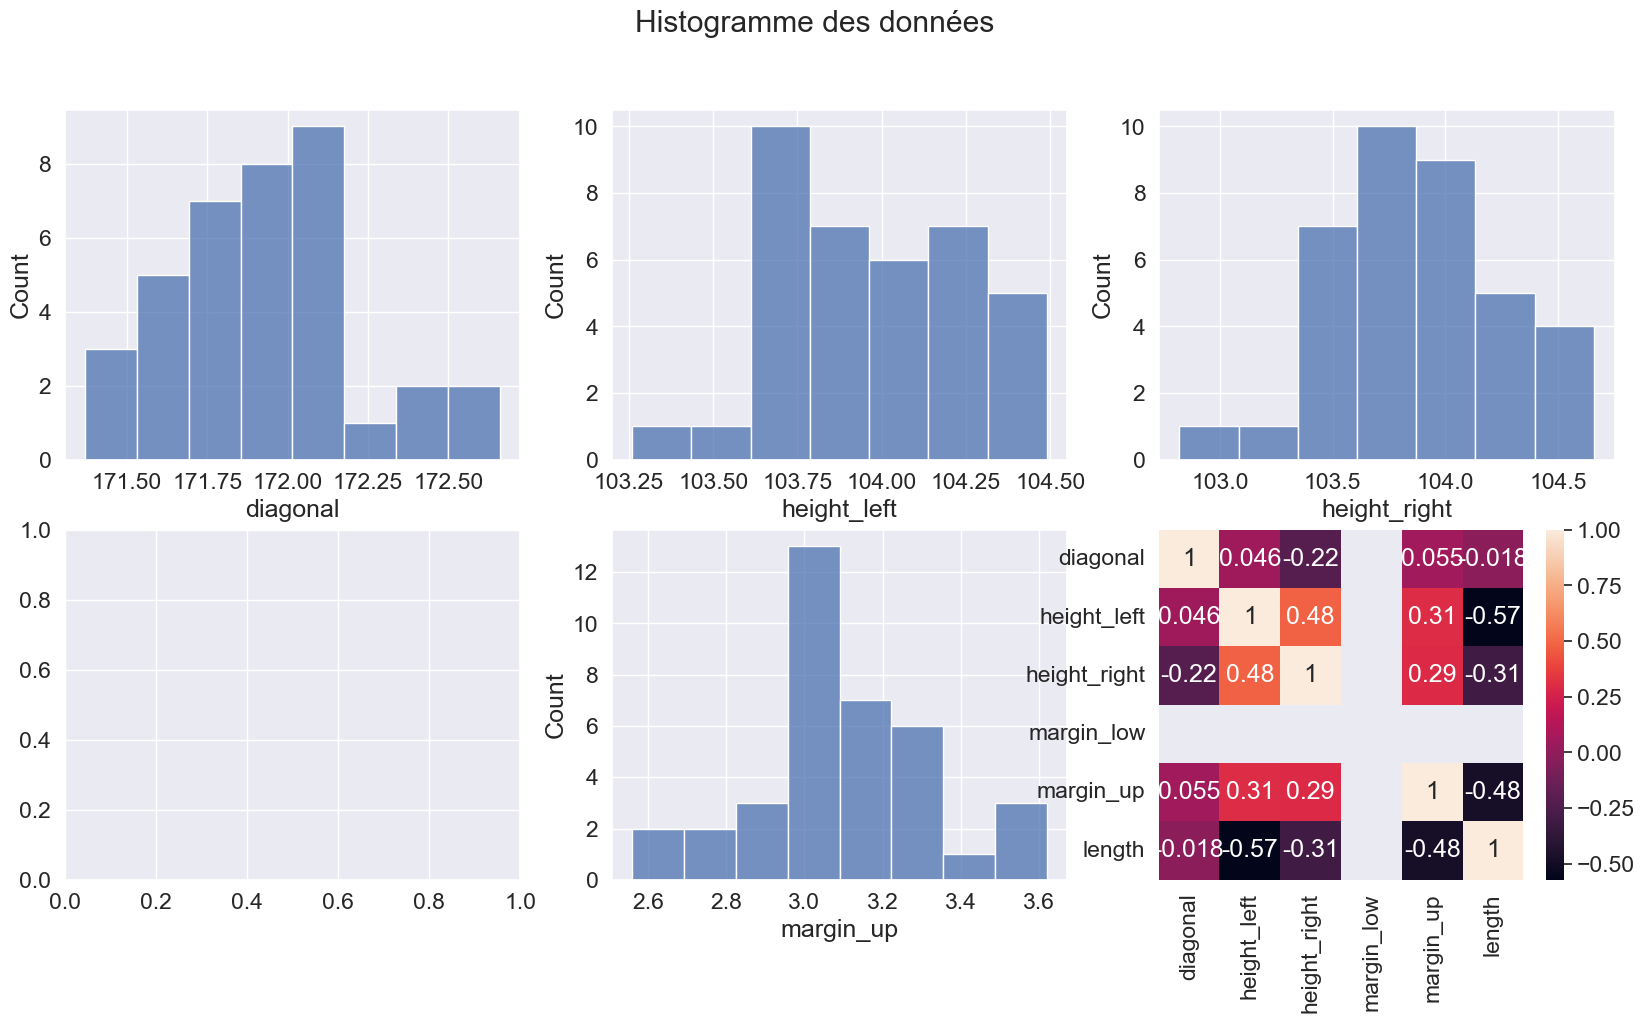

In [18]:
hm = sns.heatmap(corr, annot = True, color = 'red')
plt.show()

**Comparaison Vrais-Faux billets**

In [19]:
data_genuine_variables = pd.melt(data_nvn, id_vars='is_genuine', value_vars=['diagonal', 'height_left','height_right','margin_low', 'margin_up', 'length'])
data_genuine_variables

,is_genuine,variable,value
0,True,diagonal,171.81
1,True,diagonal,171.46
2,True,diagonal,172.69
3,True,diagonal,171.36
4,True,diagonal,171.73
...,...,...,...
8773,False,length,111.28
8774,False,length,110.97
8775,False,length,111.95
8776,False,length,112.25


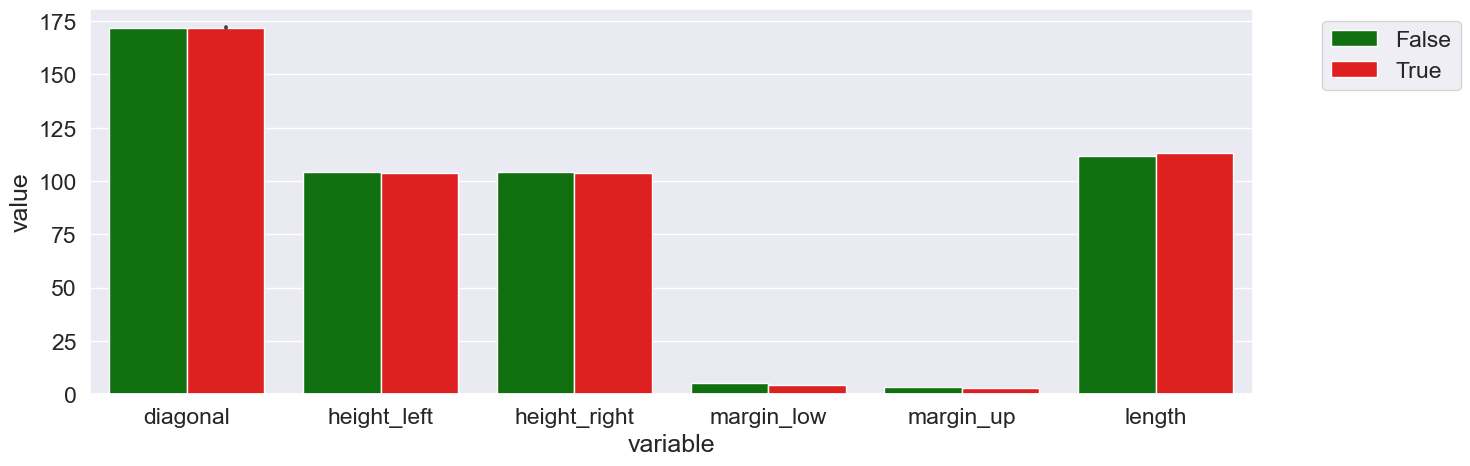

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(data=data_genuine_variables, x='variable', y='value', hue='is_genuine', ax=ax, palette={'red','green'})
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [21]:
data_genuine_variables.groupby(['is_genuine', 'variable']).agg({'value': ['mean', 'min', 'max']}).reset_index()

is_genuine      variable       value                
                                   mean     min     max
0       False      diagonal  171.901402  171.04  173.01
1       False   height_left  104.188537  103.51  104.88
2       False  height_right  104.143272  103.43  104.95
3       False        length  111.632114  109.49  113.85
4       False    margin_low    5.215935    3.82    6.90
5       False     margin_up    3.351504    2.92    3.91
6        True      diagonal  171.988476  171.04  172.92
7        True   height_left  103.951679  103.14  104.86
8        True  height_right  103.809094  102.91  104.95
9        True        length  113.203059  111.76  114.32
10       True    margin_low    4.116097    2.98    5.04
11       True     margin_up    3.052544    2.27    3.74

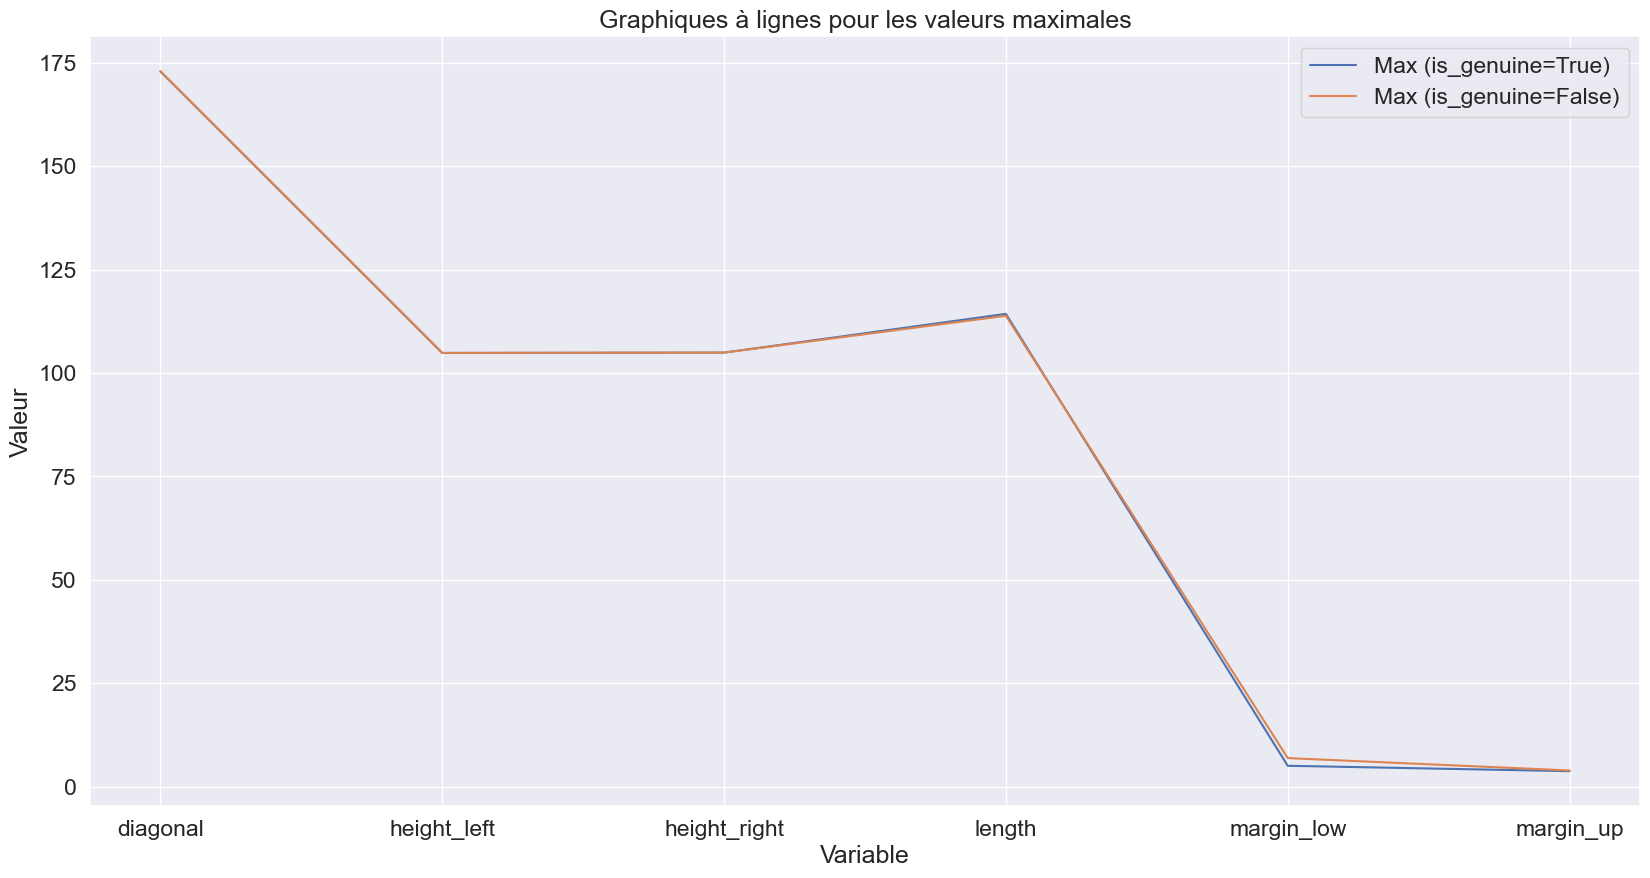

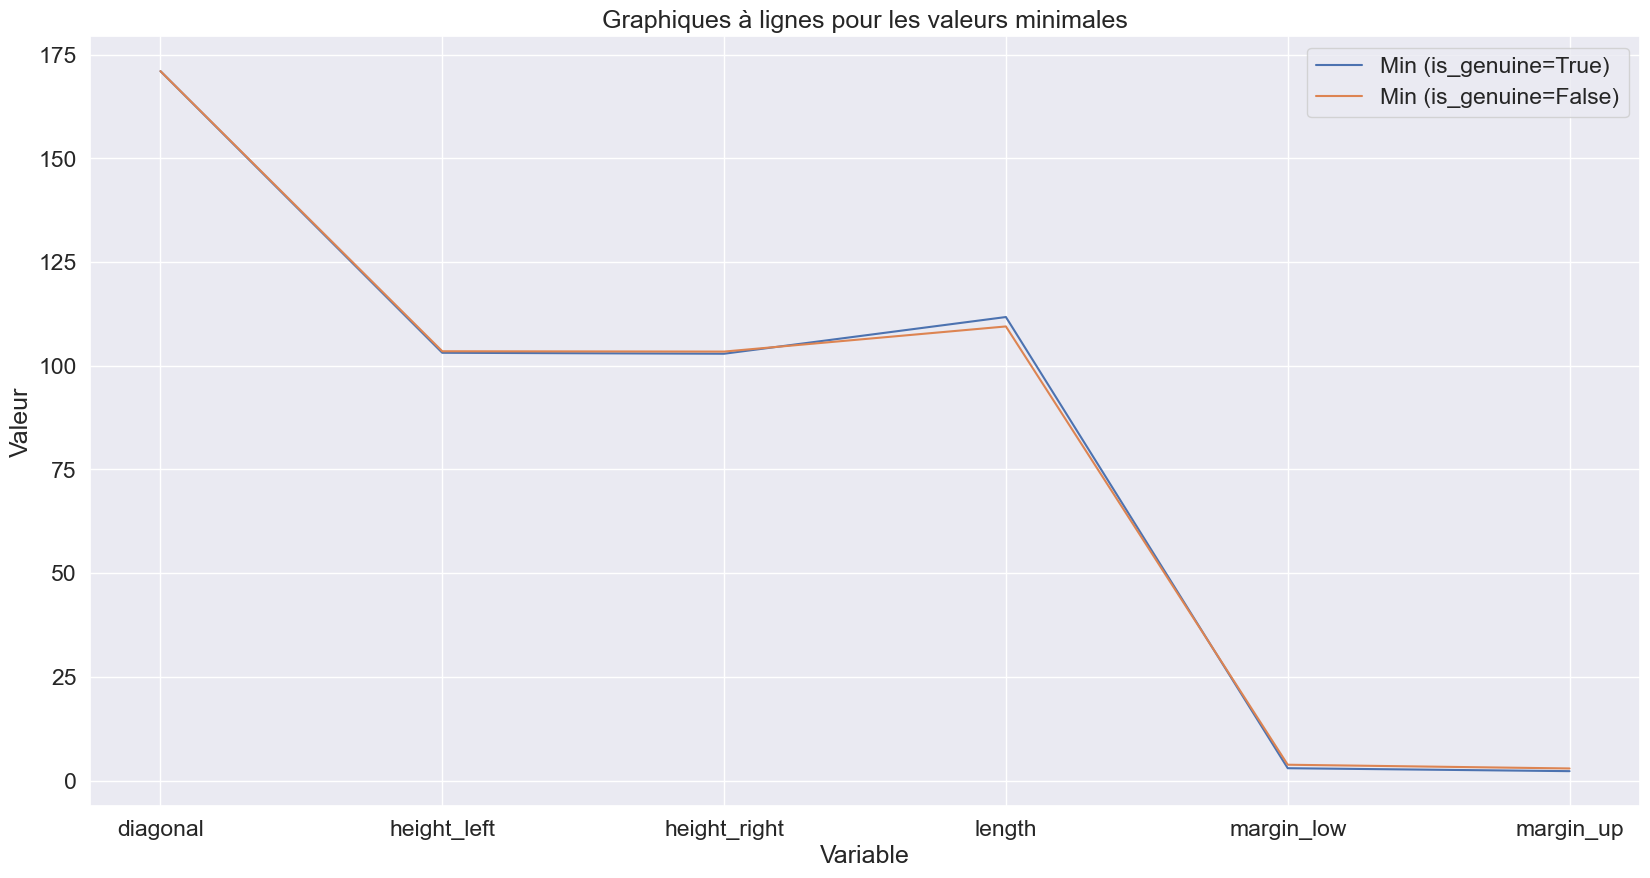

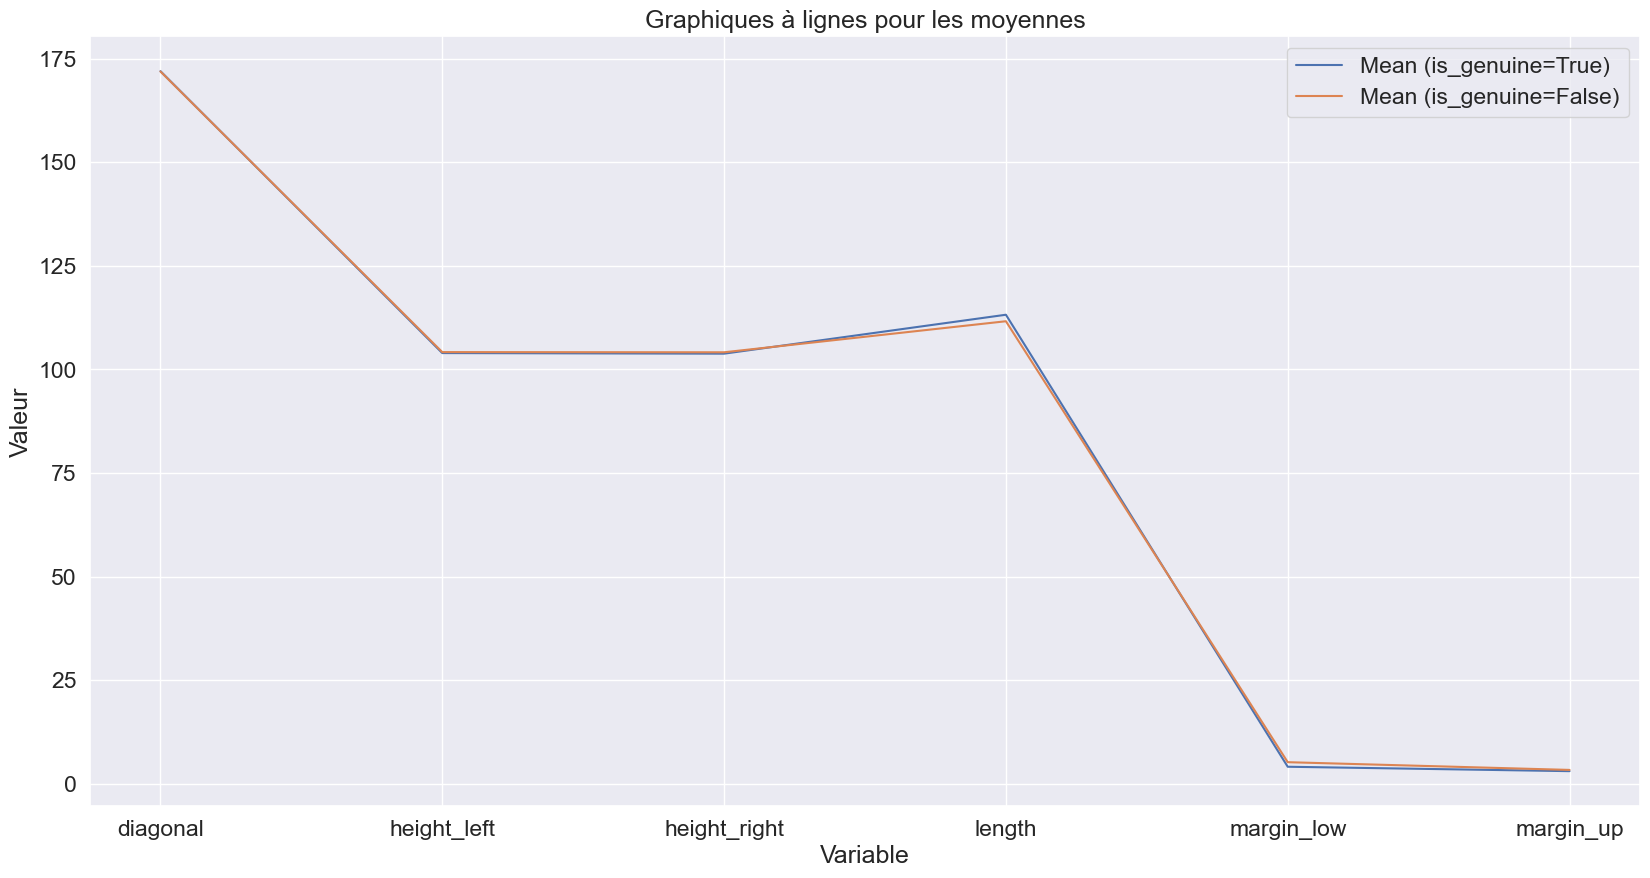

In [22]:
# Données groupées
grouped_data = data_genuine_variables.groupby(['is_genuine', 'variable']).agg({'value': ['mean', 'min', 'max']}).reset_index()

# Filtrer les données pour is_genuine=True
data_true = grouped_data[grouped_data['is_genuine'] == True]

# Filtrer les données pour is_genuine=False
data_false = grouped_data[grouped_data['is_genuine'] == False]

# Extraire les données pour les valeurs maximales
max_data_true = data_true[('value', 'max')]
max_data_false = data_false[('value', 'max')]

# Extraire les données pour les valeurs minimales
min_data_true = data_true[('value', 'min')]
min_data_false = data_false[('value', 'min')]

# Extraire les données pour les moyennes
mean_data_true = data_true[('value', 'mean')]
mean_data_false = data_false[('value', 'mean')]

# Créer un graphique à lignes pour les valeurs maximales
plt.plot(data_true['variable'], max_data_true, label='Max (is_genuine=True)')
plt.plot(data_false['variable'], max_data_false, label='Max (is_genuine=False)')

# Ajouter des légendes et des titres pour les valeurs maximales
plt.legend()
plt.xlabel('Variable')
plt.ylabel('Valeur')
plt.title('Graphiques à lignes pour les valeurs maximales')

# Afficher le graphique pour les valeurs maximales
plt.show()

# Créer un graphique à lignes pour les valeurs minimales
plt.plot(data_true['variable'], min_data_true, label='Min (is_genuine=True)')
plt.plot(data_false['variable'], min_data_false, label='Min (is_genuine=False)')

# Ajouter des légendes et des titres pour les valeurs minimales
plt.legend()
plt.xlabel('Variable')
plt.ylabel('Valeur')
plt.title('Graphiques à lignes pour les valeurs minimales')

# Afficher le graphique pour les valeurs minimales
plt.show()

# Créer un graphique à lignes pour les moyennes
plt.plot(data_true['variable'], mean_data_true, label='Mean (is_genuine=True)')
plt.plot(data_false['variable'], mean_data_false, label='Mean (is_genuine=False)')

# Ajouter des légendes et des titres pour les moyennes
plt.legend()
plt.xlabel('Variable')
plt.ylabel('Valeur')
plt.title('Graphiques à lignes pour les moyennes')

# Afficher le graphique pour les moyennes
plt.show()

# Analyse en composantes principales
[Sommaire](#Sommaire:)

In [23]:
data_Null = data.dropna()
Var = data_Null.drop(columns= ['is_genuine'])
# dans array numpy
X = Var.values 
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)

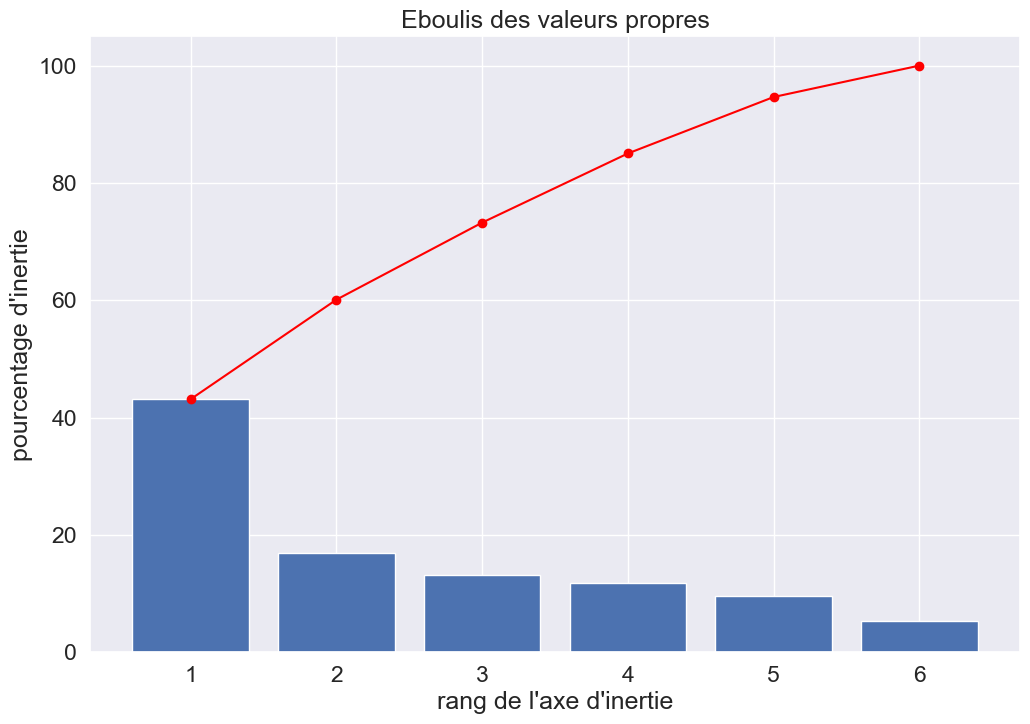

In [24]:
from sklearn import decomposition
pca = decomposition.PCA().fit(X_std) #sklearn
var_expl = pca.explained_variance_ratio_*100
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(var_expl))+1, var_expl)
plt.plot(np.arange(len(var_expl))+1, var_expl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [25]:
# Varience expliquée
var_expl

array([43.12352713, 16.97065144, 13.13642303, 11.79216859,  9.62035986,
        5.35686995])

In [26]:
# Varience cumulée
var_cum = var_expl.cumsum().round()
var_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

**Composantes principales**

In [27]:
#la matrice de corrélation

t=pca.components_[:]
df_corr_comp = pd.DataFrame(t,index = ['F1', 'F2', 'F3','F4','F5','F6'],columns=Var.columns)
df_corr_comp.head(6).round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,-0.09,0.33,0.39,0.51,0.44,-0.53
F2,0.94,0.31,0.12,-0.07,-0.01,0.05
F3,-0.28,0.89,-0.22,-0.10,-0.23,0.14
F4,-0.13,0.00,0.85,-0.09,-0.47,0.18
F5,-0.12,0.09,0.25,-0.57,0.71,0.30
F6,0.01,0.00,0.01,0.62,0.18,0.76


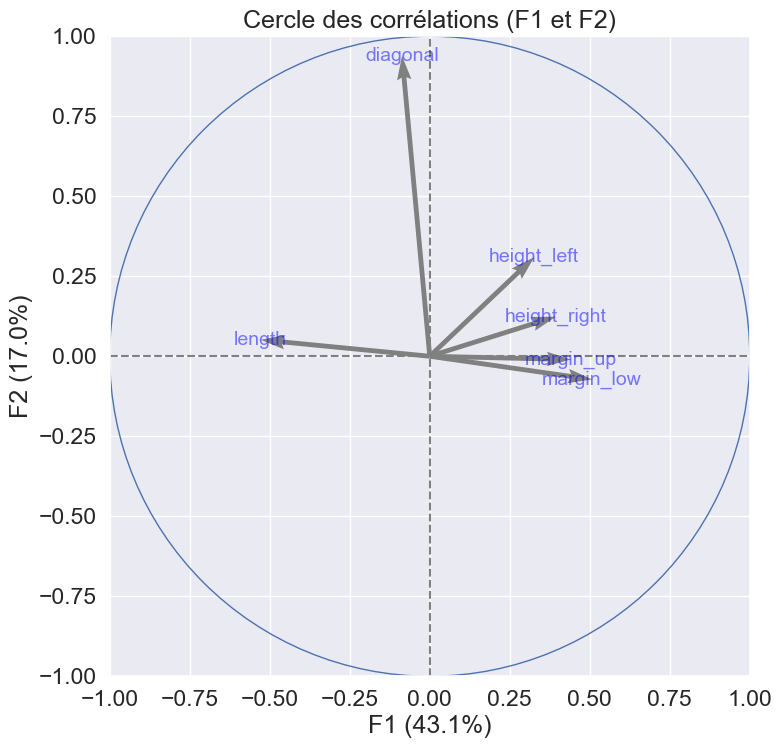

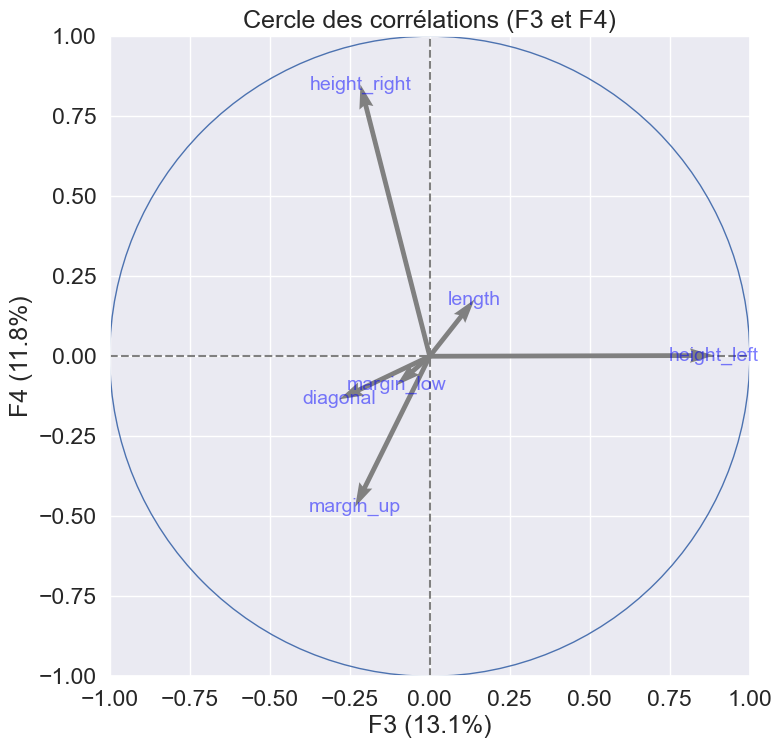

In [28]:
# Cercles de corrélation
def cerle_corr(t, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            #fig, ax = plt.subplots(figsize=(12,(n_comp*2)))
            #ax.set_aspect('equal', adjustable='box')
            fig=plt.figure(figsize=(8,8))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box')

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            else :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
        
            # affichage des flèches
            plt.quiver(np.zeros(t.shape[1]), np.zeros(t.shape[1]),
                   t[d1,:], t[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(t[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
cerle_corr(t, 4, pca, [(0,1),(2,3)], labels = np.array(Var.columns))

Les variables **'height'** et **'margin'** sont corrélées positivement à F1   
Les variables **'length'** est corrélée négativement à F1  
Les variables **'diagonal'** est corrélée positivement à F2  

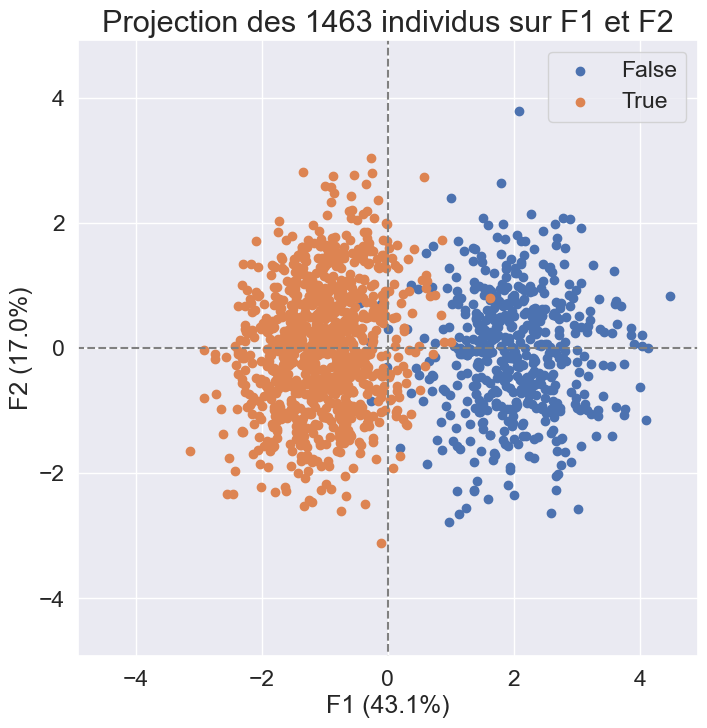

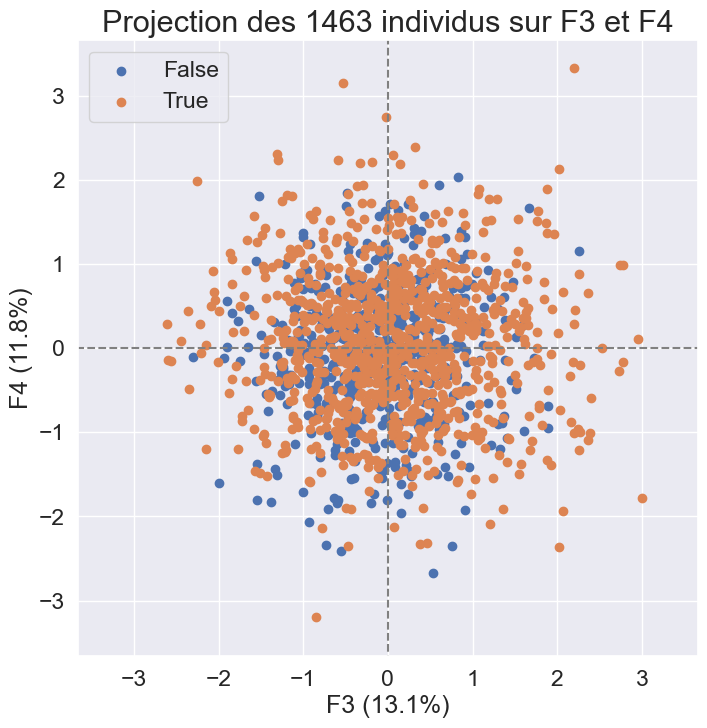

In [29]:
# Affichage des plans factoriels avec inertie des axes.
def plot_plans_factoriels(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, centroid=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(8,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
         
            
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des {} individus sur F{} et F{}".format(X_projected.shape[0], d1+1, d2+1), fontsize=22)
            plt.show(block=False)
X_projected = pca.transform(X_std)
plot_plans_factoriels(X_projected, 4, pca, [(0,1),(2,3)], illustrative_var = data_Null["is_genuine"])            

# Test statistique
[Sommaire](#Sommaire:)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


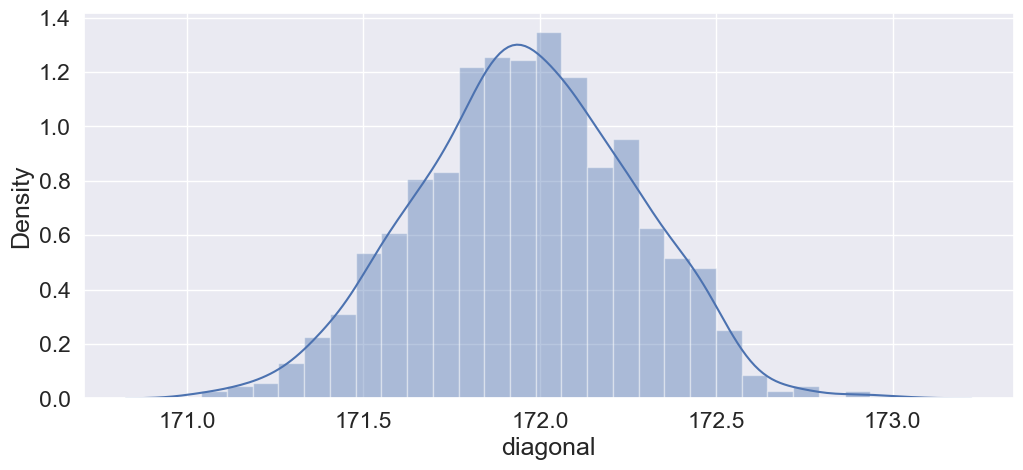

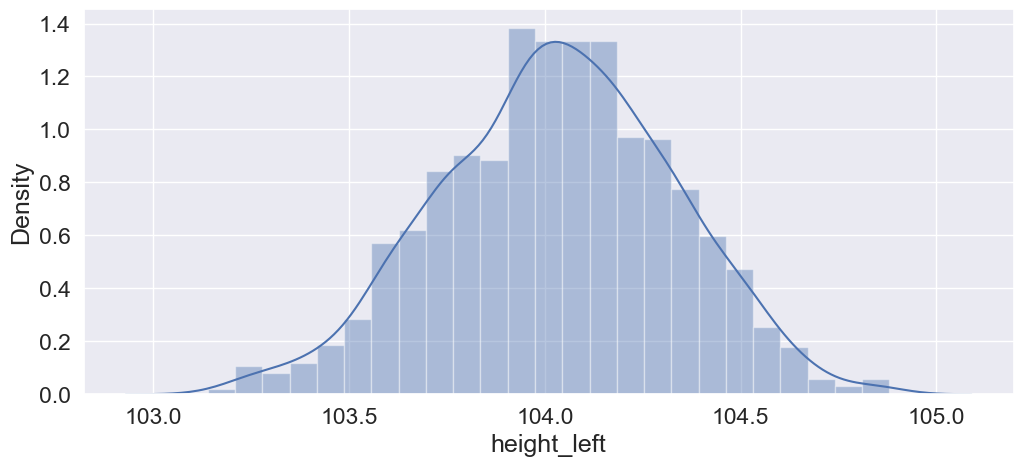

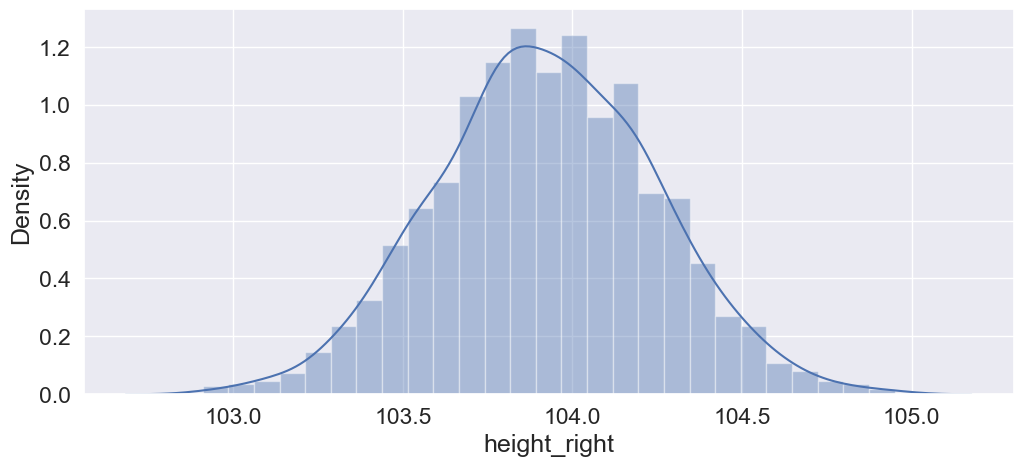

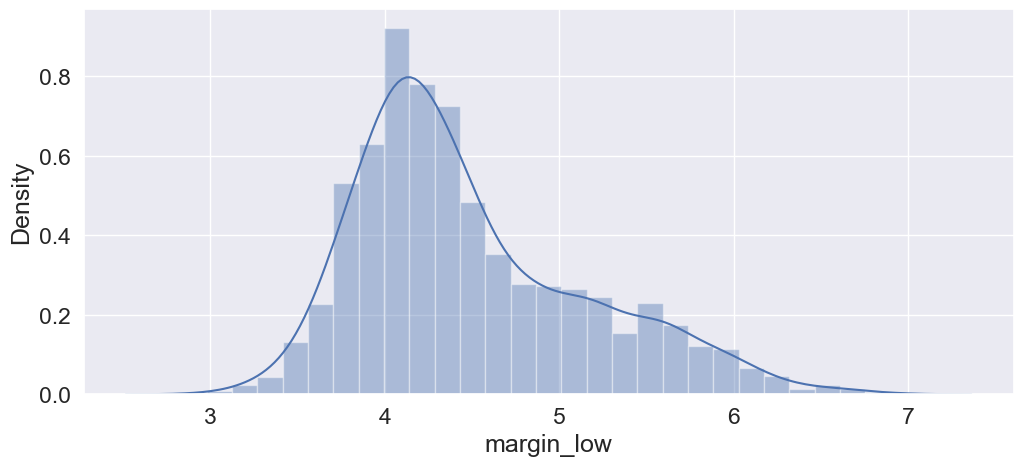

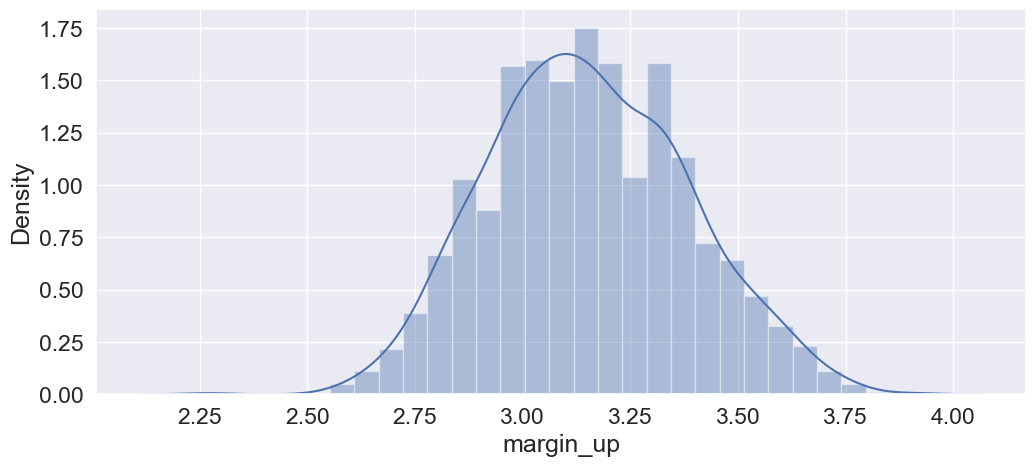

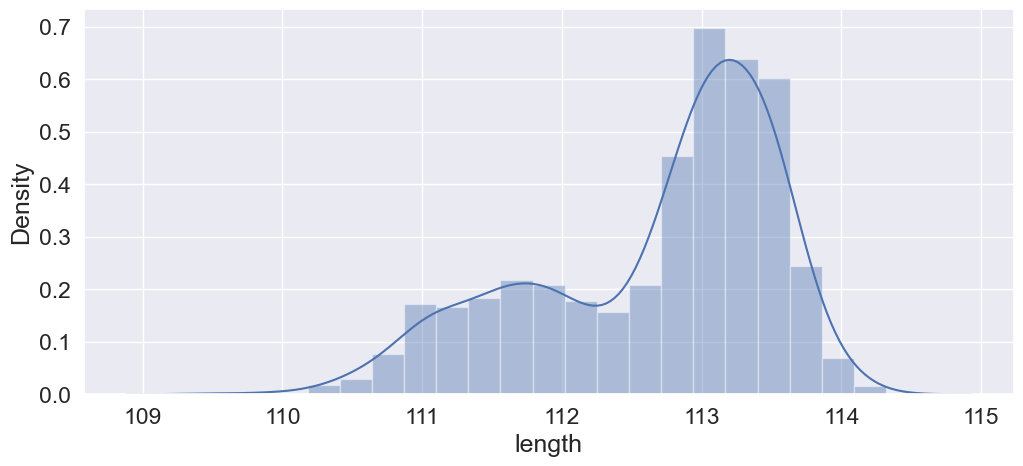

In [30]:
# Dataframe ne comprenant pas les valeurs manquantes:
donnees_sans_nan = data.dropna(how='any')
donnees_sans_nan.info()
def distribution (donnees_sans_nan): 
    variable = donnees_sans_nan.columns[1:]
    for i in variable : 
        plt.figure(figsize=(12,5))
        sns.distplot(donnees_sans_nan[i])
        plt.show()
distribution (donnees_sans_nan)

**Test de la normalité des distributions (Shapiro-Wilk)**
Avec un risque premier alpha = 0.05, on émet les deux hypothèses:  
**H0:**  la variable suit une loi normale  
**H1:**  la variable ne suit pas une loi normale  

In [31]:
DSN=donnees_sans_nan.drop(columns= ['is_genuine'])
DSN.columns.values.tolist()

['diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length']

In [32]:
#ShapiroTest:
alpha = 0.05
for i in DSN.iloc[:,:]:
    stat, pvalue = stats.shapiro(donnees_sans_nan[i])
    print(pvalue)
    if pvalue > alpha:
        print("\nLes données suivent une loi normale")
    else:
        print("\nNous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale")

0.2687021493911743

Les données suivent une loi normale
0.05763062462210655

Les données suivent une loi normale
0.9576431512832642

Les données suivent une loi normale
2.8283876088209786e-24

Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale
0.0004760113952215761

Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale
1.0767076021107087e-27

Nous rejetons l’hypothèse nulle, les données ne suivent pas une loi normale


On trouve que les données des 'diagonal','height_left','height_right' *suivent une loi normale, les données des 'margin_low','margin_up', 'length'ne suivent pas une loi normale.

**Test des differences entre les billets 'True' et 'False'**  
on va utiliser Anova pour les variable qui suivent une loi normale et Kruskal – Wallis pour les variables ne suivent pas une loi normal

**Analyse de variance (ANOVA)**  
Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:  
H0: Les moyennes de 'margin_low' des vrais billets et faux billets sont sont égaux  
H1: Les moyennes de 'margin_low' des vrais billets et faux billets ne sont pas égaux

In [33]:
grp1=donnees_sans_nan[donnees_sans_nan.is_genuine == True].diagonal 
grp2=donnees_sans_nan[donnees_sans_nan.is_genuine == False].diagonal
#perform anova Test 
stats.f_oneway(grp1, grp2)

F_onewayResult(statistic=27.00642755639178, pvalue=2.3146624660881635e-07)

p_value < 0.05, nous rejetons l’hypothèse nulle, donc les moyennes de 'margin_low' des vrais billets et faux billets ne sont pas égaux

In [34]:
grp1=donnees_sans_nan[donnees_sans_nan.is_genuine == True].height_left 
grp2=donnees_sans_nan[donnees_sans_nan.is_genuine == False].height_left
#perform anova Test 
stats.f_oneway(grp1, grp2)

F_onewayResult(statistic=237.03704807380916, pvalue=1.1114157003721756e-49)

p_value < 0.05, nous rejetons l’hypothèse nulle, donc les moyennes de 'margin_low' des vrais billets et faux billets ne sont pas égaux

In [35]:
grp1=donnees_sans_nan[donnees_sans_nan.is_genuine == True].height_right 
grp2=donnees_sans_nan[donnees_sans_nan.is_genuine == False].height_right
#perform anova Test 
stats.f_oneway(grp1, grp2)

F_onewayResult(statistic=454.6683446453273, pvalue=4.708598379063427e-88)

p_value < 0.05, nous rejetons l’hypothèse nulle, donc les moyennes de 'margin_low' des vrais billets et faux billets ne sont pas égaux

In [36]:
grp1=donnees_sans_nan[donnees_sans_nan.is_genuine == True].length 
grp2=donnees_sans_nan[donnees_sans_nan.is_genuine == False].length
#perform Kruskal-Wallis Test 
stats.kruskal(grp1, grp2)

KruskalResult(statistic=916.9098418068461, pvalue=2.069483789921139e-201)

p_value < 0.05, nous rejetons l’hypothèse nulle, donc les moyennes de 'margin_low' des vrais billets et faux billets ne sont pas égaux

In [37]:
grp1=donnees_sans_nan[donnees_sans_nan.is_genuine == True].margin_up 
grp2=donnees_sans_nan[donnees_sans_nan.is_genuine == False].margin_up
#perform Kruskal-Wallis Test 
stats.kruskal(grp1, grp2)

KruskalResult(statistic=549.8948923584292, pvalue=1.326952298579742e-121)

p_value < 0.05, nous rejetons l’hypothèse nulle, donc les moyennes de 'margin_low' des vrais billets et faux billets ne sont pas égaux

In [38]:
grp1=donnees_sans_nan[donnees_sans_nan.is_genuine == True].margin_low 
grp2=donnees_sans_nan[donnees_sans_nan.is_genuine == False].margin_low
#perform Kruskal-Wallis Test 
stats.kruskal(grp1, grp2)

KruskalResult(statistic=828.742802832455, pvalue=3.040847316225815e-182)

p_value < 0.05, nous rejetons l’hypothèse nulle, donc les moyennes de 'margin_low' des vrais billets et faux billets ne sont pas égaux  

Tous les variables presentent des valeurs differentes et significatives entre les billets 'True' et les billets 'False'

## II.3. Imputation des valeurs nulles (Regression linéaire)
[Sommaire](#Sommaire:)

on effectue une regression linéaire pour remplacer les valeurs nulles.

In [39]:
# Création d'une copie du jeu de données
data_imputées = data.copy()
data_imputées.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [40]:
# Séparation des données
for column in data_imputées.columns:
    missing_indices = data_imputées[column].isnull()
    print(column)

    if missing_indices.any():
      X_complet = data_imputées.loc[~missing_indices, data_imputées.columns != column]
      y_complet = data_imputées.loc[~missing_indices, column]
      X_incomplet = data_imputées.loc[missing_indices, data_imputées.columns != column]

is_genuine
diagonal
height_left
height_right
margin_low
margin_up
length


In [41]:
print(X_complet.shape)
print(y_complet.shape)
print(X_incomplet.shape)

(1463, 6)
(1463,)
(37, 6)


In [43]:
data_nvn=data_nvn.drop(columns ='is_genuine')

In [44]:
data_nvn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      1463 non-null   float64
 1   height_left   1463 non-null   float64
 2   height_right  1463 non-null   float64
 3   margin_low    1463 non-null   float64
 4   margin_up     1463 non-null   float64
 5   length        1463 non-null   float64
dtypes: float64(6)
memory usage: 80.0 KB


# Test des conditions d'application de la régression linéaire

In [45]:
reg_multi = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data = data_nvn).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.60e-202
Time:                        20:28:31   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

Les variables sont statistiquement significatives.

**Test de la colinéarité des variables**

In [46]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0136128990686315,
 1.1382605736082538,
 1.2301145155560338,
 1.404403778184362,
 1.5769501453665806]

Tous les coefficients sont inférieurs à 10, il n'y a pas de problème de colinéarité.

In [47]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 7.759535216194938e-16


La p-valeur ici est inférieure à  5%, on rejette l'hypothèse  𝐻0 selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité). Nous allons réaliser une observation graphique des résidus afin de déterminer s'il est tout de même cohérent d'utiliser une régression linéaire.

In [48]:
# nombre d'individus
n = data_nvn.shape[0]
# nombre de variables
p = 5

In [49]:
# création du DataFrame
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = stats.t.ppf(1-0.05/2,n-p-1)

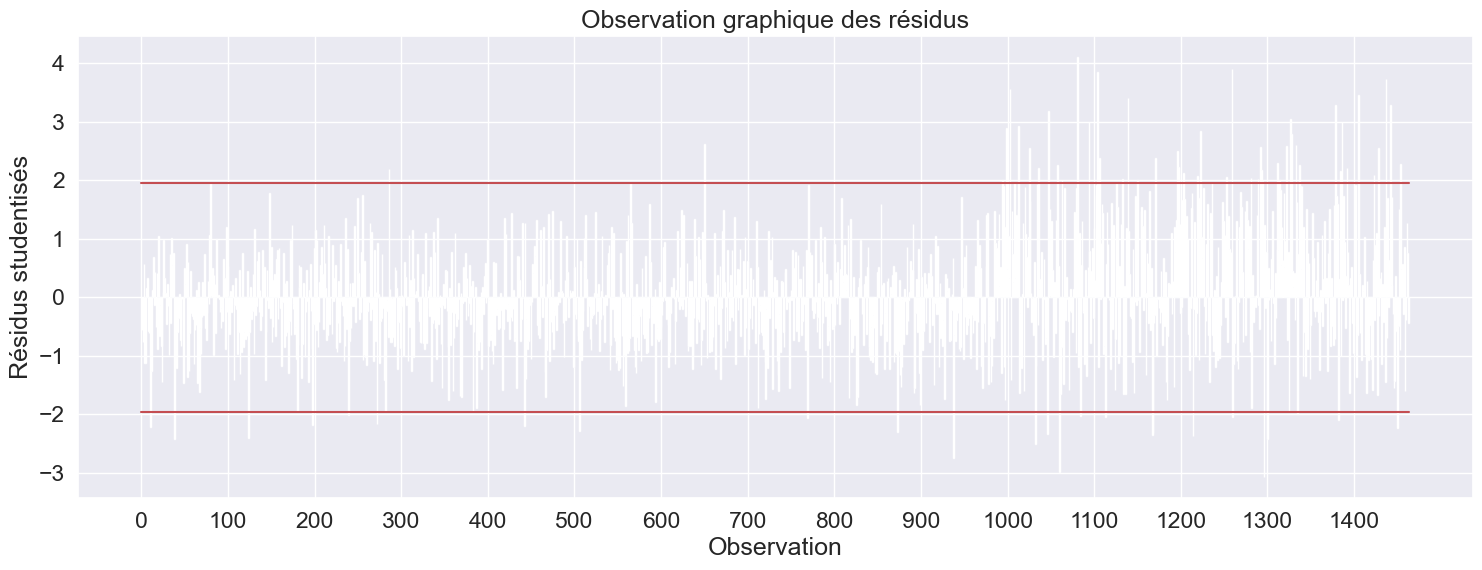

In [50]:
# création du graphique
plt.figure(figsize=(18,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, n+1, step=100))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, n+1], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, n+1], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.title('Observation graphique des résidus')
plt.show()

On constate que peu de résidus studentisés sont supérieurs à l'écart-type empirique. De plus, l'échantillon est suffisamment grand (supérieur à 30) pour considérer qu'il n'est pas aberrant d'utilisier un modèle de régression linéaire malgré l'hétéroscédasticité des résidus.

**Test de la normalité des résidus**

In [51]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9857882857322693, pvalue=8.540482210328548e-11)

Ici, l'hypothèse de normalité est validée (p-value < 0.05).

**Implémentation** 

In [52]:
from sklearn.linear_model import LinearRegression
## Building the model
model = LinearRegression()
model.fit(X_complet, y_complet)

LinearRegression()

In [53]:
## Predicting the missing values
y_predit = model.predict(X_incomplet)

In [54]:
y_predict = y_predit.round(2)
y_predict

array([4.06, 4.11, 4.13, 3.99, 4.14, 4.09, 4.07, 4.13, 4.08, 4.07, 4.12,
       4.18, 4.14, 4.05, 4.18, 4.23, 4.12, 4.1 , 4.08, 4.09, 4.11, 4.16,
       4.16, 4.12, 4.12, 4.2 , 4.11, 4.1 , 4.13, 5.26, 5.26, 5.28, 5.3 ,
       5.2 , 5.18, 5.17, 5.25])

In [55]:
## Remplacement des données manquentes avec les données prédites
data_imputées.loc[data_imputées['margin_low'].isna(), 'margin_low'] = y_predit

In [56]:
data_imputées.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [57]:
## Sauvgarde des données complètes sous frmat csv.
data_imputées.to_csv("imputed_bills.csv")

<span style="font-size:30px ; color:">**III/ Prédiction des Vrais-Faux billets**</span> 

## III.1. Importation des données
[Sommaire](#Sommaire:)

In [58]:
# Importation des données complètes
full_dataset = pd.read_csv('imputed_bills.csv')
full_dataset

,Unnamed: 0,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...,...
1495,1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,1498,False,172.06,104.28,104.06,5.17,3.46,112.25


# III.2. Regresssion logistique
[Sommaire](#Sommaire:)

La régression logistique est une méthode de classification (supervisée) qui permet de prédire la probabilité qu’un événement arrive **(vrai ou 1)** ou non **(faux ou 0)** à partir de l’optimisation des coefficients de régression. Ce résultat varie toujours entre 0 et 1. Lorsque la valeur prédite est supérieure à un seuil, l’événement est susceptible de se produire, alors que lorsque cette valeur est inférieure au même seuil, il ne l’est pas.

In [59]:
# Génération du jeu de donnée pour la regression logistique
Xlog = full_dataset.drop(['is_genuine'], axis=1)
ylog = full_dataset['is_genuine']
# Séparation données entrainement / données test
X_trainlog, X_testlog, y_trainlog, y_testlog = train_test_split(Xlog,ylog,test_size=0.25, random_state=5)

In [60]:
Xlog = Xlog.drop(columns='Unnamed: 0')

In [61]:
# Concaténation des données
datalog_train = pd.concat((X_trainlog, y_trainlog), axis=1).reset_index(drop=True)
datalog_test = pd.concat((X_testlog, y_testlog), axis=1).reset_index(drop=True)

In [62]:
reg_log_multi = smf.glm('is_genuine ~ diagonal+height_left+height_right+margin_low+margin_up+length', data=datalog_train, family=sm.families.Binomial()).fit()
print(reg_log_multi.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1125
Model:                                                   GLM   Df Residuals:                     1118
Model Family:                                       Binomial   Df Model:                            6
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -23.953
Date:                                       Tue, 10 Oct 2023   Deviance:                       47.906
Time:                                               20:28:35   Pearson chi2:                 1.41e+04
No. Iterations:                                           11   Pseudo R-squ. (CS):             0.7067
Covariance Type:                                   nonrobust                      

Retrait des variables non significatives

On retire donc les variables non significatives avec la procédure descendante ou backward une par une.

In [63]:
reg_log_multi = smf.glm('is_genuine ~ height_left+height_right+margin_low+margin_up+length', data=datalog_train, family=sm.families.Binomial(), random_state=11).fit()
print(reg_log_multi.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1125
Model:                                                   GLM   Df Residuals:                     1119
Model Family:                                       Binomial   Df Model:                            5
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -24.077
Date:                                       Tue, 10 Oct 2023   Deviance:                       48.155
Time:                                               20:28:35   Pearson chi2:                 1.26e+04
No. Iterations:                                           11   Pseudo R-squ. (CS):             0.7067
Covariance Type:                                   nonrobust                      

In [64]:
reg_log_multi = smf.glm('is_genuine ~ height_right+margin_low+margin_up+length', data=datalog_train, family=sm.families.Binomial(), random_state=11).fit()
print(reg_log_multi.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1125
Model:                                                   GLM   Df Residuals:                     1120
Model Family:                                       Binomial   Df Model:                            4
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -24.719
Date:                                       Tue, 10 Oct 2023   Deviance:                       49.438
Time:                                               20:28:35   Pearson chi2:                 1.38e+04
No. Iterations:                                           11   Pseudo R-squ. (CS):             0.7063
Covariance Type:                                   nonrobust                      

on construit une matrice de confusion

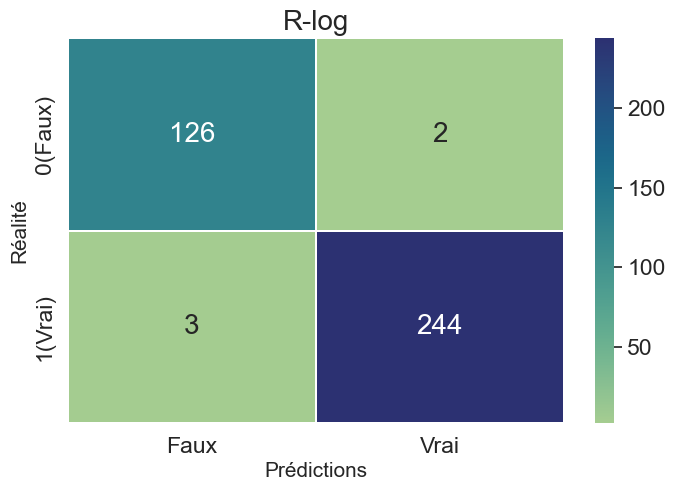

In [65]:
# Matrice de confusion
# Graphique:
def matriceConfusion(mc,titre) :
    plt.figure(figsize=(8,5))
    sns.heatmap(mc, annot = True, fmt = ".3g",
                cmap = sns.color_palette("crest", as_cmap=True),
                linecolor = "white", linewidths = 0.3,
                xticklabels = ["Faux","Vrai"],
                yticklabels=["0(Faux)","1(Vrai)"]
                , annot_kws={"size":20})
    plt.xlabel("Prédictions", fontsize=15)
    plt.ylabel("Réalité",fontsize=15)
    plt.title(titre,fontsize=20)
    plt.show()
# notre algorithme predit las faux billets
datalog_test["proba"] = (reg_log_multi.predict(datalog_test)).round(4)
datalog_test["y_pred"] = reg_log_multi.predict(datalog_test) < 0.5
mtr_conf_reg=pd.crosstab(datalog_test['is_genuine'],datalog_test["y_pred"])
matriceConfusion(mtr_conf_reg,'R-log')

Calculons ls F1-Score

In [66]:
# Classification report
target_names = ['Faux Billets', 'Vrai Billets']
print(classification_report(datalog_test['is_genuine'],datalog_test["y_pred"], target_names=target_names))

              precision    recall  f1-score   support

Faux Billets       0.98      0.98      0.98       128
Vrai Billets       0.99      0.99      0.99       247

    accuracy                           0.99       375
   macro avg       0.98      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



In [67]:
# Model Precision
Precision_reg=metrics.precision_score(datalog_test['is_genuine'],datalog_test["y_pred"])
print("Precision:",Precision_reg)

# Model Recall
print("Recall:",metrics.recall_score(datalog_test['is_genuine'],datalog_test["y_pred"]))

Precision: 0.991869918699187
Recall: 0.9878542510121457


# La courbe ROC (Régression logistique)
La courbe ROC (Receiver Operating Characteristic) représente la sensibilité en fonction de 1 – spécificité pour toutes les valeurs seuils possibles du marqueur étudié.

L'aire sous la courbe ROC (ou Area Under the Curve, AUC) peut être interprétée comme la probabilité. Une AUC de 0,5 (50%) indique que le marqueur est non-informatif.

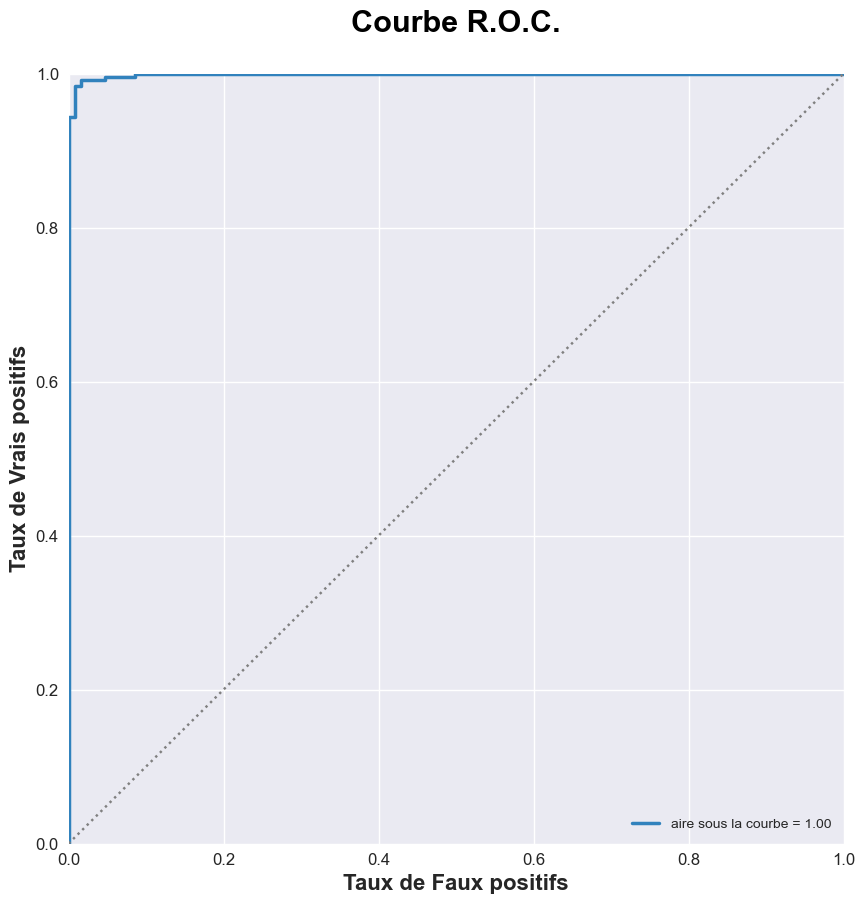

In [68]:

# Courbe R.O.C.:
fpr, tpr, _ = roc_curve(datalog_test['is_genuine'],1-datalog_test["proba"])
roc_auc = roc_auc_score(datalog_test['is_genuine'],1-datalog_test["proba"])

# Graphique:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Courbe R.O.C.",
 fontsize=22, weight='bold', color='Black', loc='center',pad=30)
plt.box(True)

plt.plot(fpr, tpr, color="#3182bd", linewidth=2.5, label="aire sous la courbe = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1],color="grey", linestyle=":")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = "lower right")
plt.ylabel("Taux de Vrais positifs", weight='bold', size=16)
plt.xlabel("Taux de Faux positifs", weight='bold', size=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()

In [69]:
roc_auc

0.9990194838056681

# Prédiction avec la Régression logistique

In [70]:
billets_production = pd.read_csv("billets_production.csv")
billets_production['Prediction RegLog'] = reg_log_multi.predict(billets_production) < 0.5
billets_production[['id','Prediction RegLog']]

,id,Prediction RegLog
0,A_1,False
1,A_2,False
2,A_3,False
3,A_4,True
4,A_5,True


# III.3. K_means
[Sommaire](#Sommaire:)

In [71]:
X = full_dataset.drop(['is_genuine'], axis=1)
y = full_dataset['is_genuine']
X = X.drop(columns='Unnamed: 0')

In [72]:
# Séparation des données entrainement / test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)
X = X_train.values 
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_cr = std_scale.transform(X)
intertia = []
k_list = range(1, 5)
list(k_list)
for i in k_list :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_cr) 
    intertia.append(kmeans.inertia_)
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)
kmeans = KMeans(n_clusters=2, random_state=11)
x_Kmeans = kmeans.fit_transform(X_train)

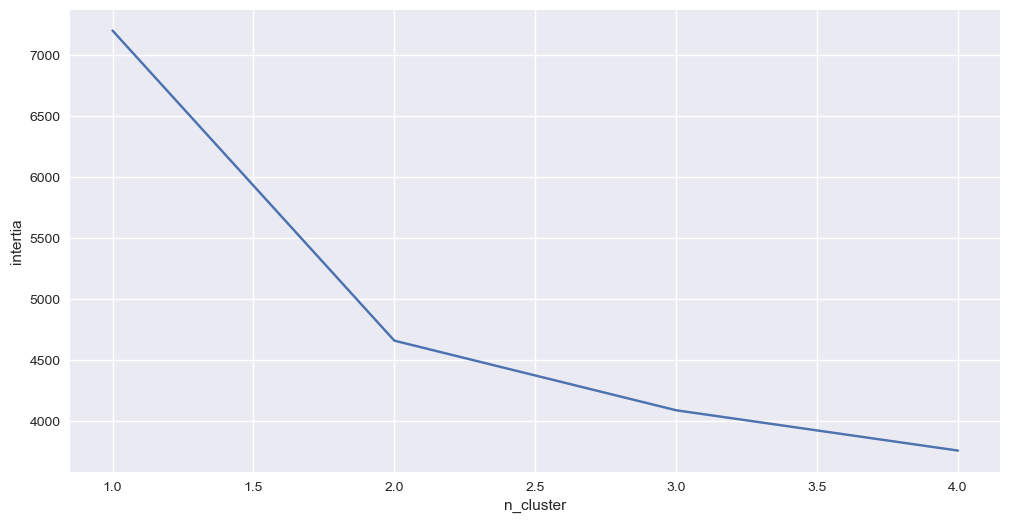

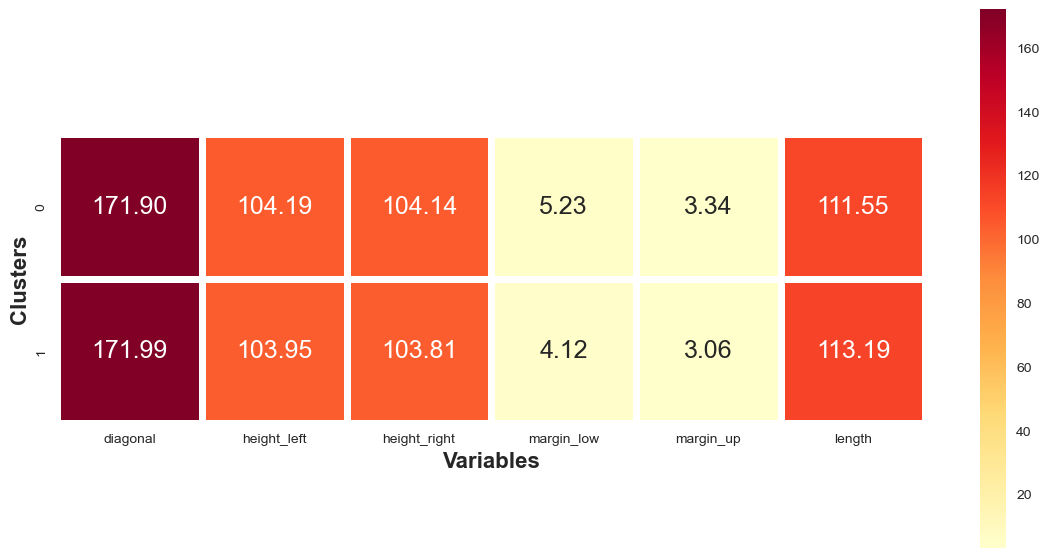

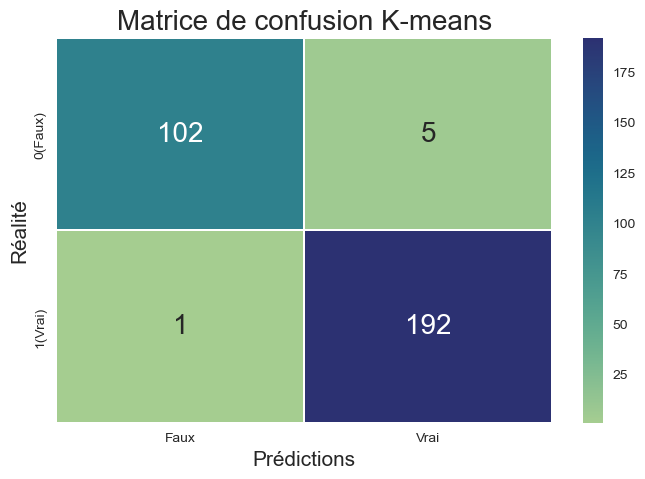

In [73]:
# Ajout d'une colonne contenant le cluster attribue:
clusters_km = kmeans.labels_
centroids_km = kmeans.cluster_centers_
# Nombre d'individus par groupes
pd.Series(clusters_km).value_counts()
billets_centroid_df = pd.DataFrame(centroids_km, columns=X_train.columns)
fig2 = billets_centroid_df
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(fig2, linewidth=5, annot = True, fmt='.2f', cmap="YlOrRd", cbar_kws={"shrink": 0.5}, square=True)
plt.ylabel("Clusters",weight='bold',size=16)
plt.xlabel("Variables",weight='bold',size=16)
plt.show()
production_kmean = kmeans.predict(X_test)
km_matrix = pd.crosstab(y_test,production_kmean)

# Création de la matrice 
production_kmean = kmeans.predict(X_test)
km_matrix = pd.crosstab(y_test,production_kmean)

# Graphique:
def matriceConfusion(mc,titre) :
    plt.figure(figsize=(8,5))
    sns.heatmap(mc, annot = True, fmt = ".3g",
                cmap = sns.color_palette("crest", as_cmap=True),
                linecolor = "white", linewidths = 0.3,
                xticklabels = ["Faux","Vrai"],
                yticklabels=["0(Faux)","1(Vrai)"]
                , annot_kws={"size":20})
    plt.xlabel("Prédictions", fontsize=15)
    plt.ylabel("Réalité",fontsize=15)
    plt.title(titre,fontsize=20)
    plt.show()
matriceConfusion(km_matrix,'Matrice de confusion K-means')

In [74]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,production_kmean))
# Model Precision
Precision_kmeans=metrics.precision_score(y_test,production_kmean)
print("Precision:",(Precision_kmeans).round(3))

              precision    recall  f1-score   support

       False       0.99      0.95      0.97       107
        True       0.97      0.99      0.98       193

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.98       300
weighted avg       0.98      0.98      0.98       300

Precision: 0.975


In [75]:
# Model Recall
print("Recall:",(metrics.recall_score(y_test,production_kmean)).round(3))
# Predictions sur des donnees inconnues:
billets_production = pd.read_csv("billets_production.csv")
billets_production_test = billets_production.drop('id', axis=1)

billets_production["Prédiction K-means"] = kmeans.predict(billets_production_test)
billets_production['Prédiction K-means'].replace([1,0],[True,False], inplace=True)
display(billets_production[["id","Prédiction K-means"]])

Recall: 0.995


,id,Prédiction K-means
0,A_1,False
1,A_2,False
2,A_3,False
3,A_4,True
4,A_5,True


# III.4. KNeighborsClassifier
[Sommaire](#Sommaire:)

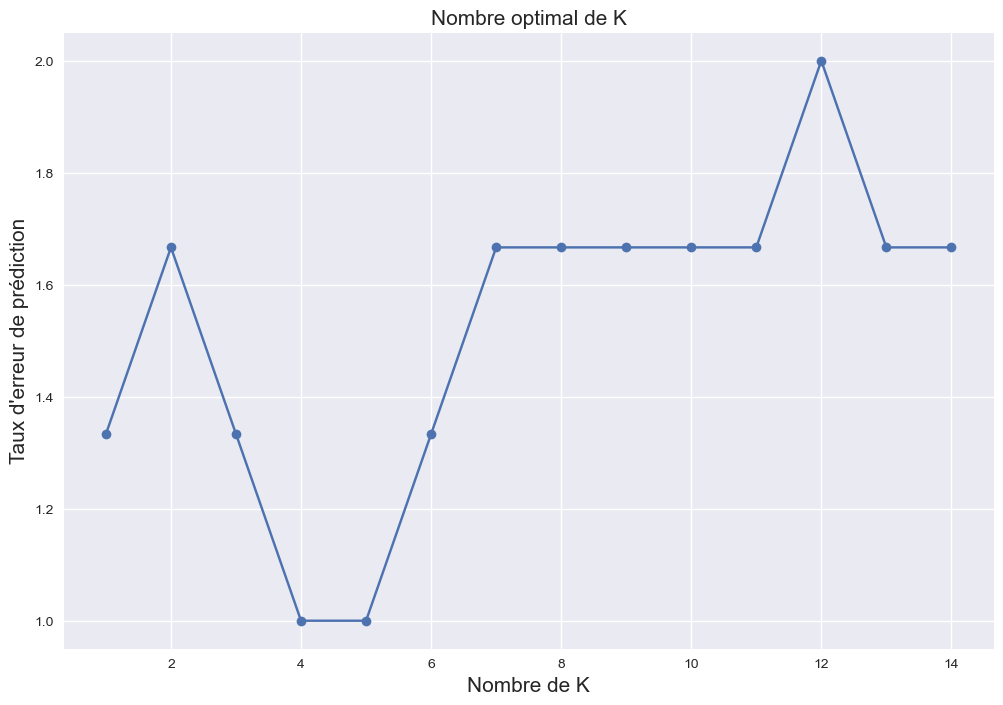

In [76]:
from sklearn import neighbors
errors = []
for k in range(1,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.figure(figsize=(12,8))
plt.plot(range(1,15), errors, 'o-')
plt.title('Nombre optimal de K',fontsize=15)
plt.ylabel("Taux d'erreur de prédiction",fontsize=15)
plt.xlabel('Nombre de K',fontsize=15)
plt.show()

In [77]:
dff = pd.DataFrame(errors, columns=['Erreur en pourcentage'])
dff['nombre de k']=range(1,15)
dff.sort_values(by='Erreur en pourcentage', ascending=True).head(5)

,Erreur en pourcentage,nombre de k
3,1.000000,4
4,1.000000,5
0,1.333333,1
2,1.333333,3
5,1.333333,6


In [78]:
# Création du modèle
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

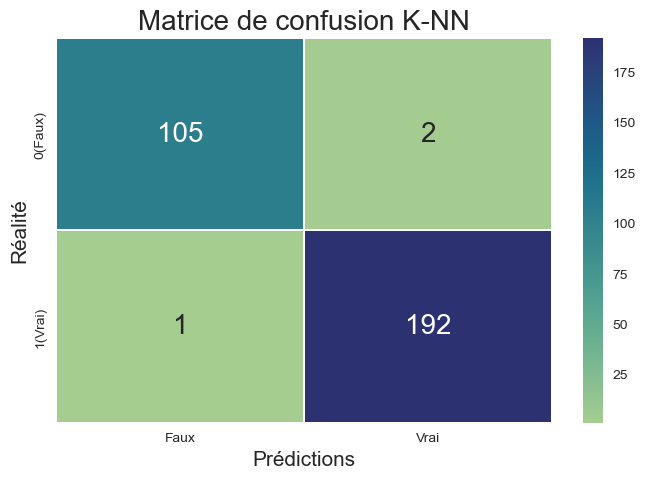

In [79]:
# Matrice de confusion 
y_pred_test_NN= knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test,y_pred_test_NN)
cnf_matrix
matriceConfusion(cnf_matrix,'Matrice de confusion K-NN')

In [80]:
# Classification report
target_names = ['Faux Billets', 'Vrai Billets']
print(classification_report(y_test,y_pred_test_NN, target_names=target_names))

              precision    recall  f1-score   support

Faux Billets       0.99      0.98      0.99       107
Vrai Billets       0.99      0.99      0.99       193

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [81]:
# Model Precision
Precision_kNN=metrics.precision_score(y_test,y_pred_test_NN)
print("Precision:",Precision_kNN)

# Model Recall
print("Recall:",metrics.recall_score(y_test,y_pred_test_NN))

Precision: 0.9896907216494846
Recall: 0.9948186528497409


In [82]:
# Prédictions avec kNN
billets_production = pd.read_csv("billets_production.csv")
billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [83]:
billets_production["Prédiction K-NN"] = knn.predict(billets_production_test)
billets_production[['id','Prédiction K-NN']]

,id,Prédiction K-NN
0,A_1,False
1,A_2,False
2,A_3,False
3,A_4,True
4,A_5,True


# III.5. Comparaison des algorithmes
[Sommaire](#Sommaire:)

In [84]:
def prog_vérfication_billets(csv):
    billet_test= pd.read_csv(csv)
    billet_value=billet_test.drop('id', axis=1)
    billet_test['Prédiction RegLog'] = reg_log_multi.predict(billet_test) < 0.5
    billet_test['Prob Vrai']=(1-(reg_log_multi.predict(billet_test))).round(3)
    billet_test["Prédiction K-means"] = kmeans.predict(billet_value)
    billet_test['Prédiction K-means'].replace([1,0],[True,False], inplace=True)
    billet_test['Prédiction K-nn'] = knn.predict(billet_value)
 
    billets_predict = billet_test[['id','Prédiction K-nn','Prédiction RegLog','Prob Vrai','Prédiction K-means']].set_index("id")
    return billets_predict

In [85]:
# Tester la fonction
prog_vérfication_billets('billets_production.csv')

,Prédiction K-nn,Prédiction RegLog,Prob Vrai,Prédiction K-means
id,,,,
A_1,False,False,0.000,False
A_2,False,False,0.000,False
A_3,False,False,0.000,False
A_4,True,True,0.999,True
A_5,True,True,1.000,True


# <span style="font-size:25px ; color:">**IV/ Application au jeu de donnée final**</span>

# IV.1. Application finale
[Sommaire](#Sommaire:)

In [86]:
prog_vérfication_billets('billets_test (1).csv')

,Prédiction K-nn,Prédiction RegLog,Prob Vrai,Prédiction K-means
id,,,,
B_1,True,True,1.0,True
B_2,False,False,0.0,False
B_3,True,True,1.0,True
B_4,False,False,0.0,False
B_5,False,False,0.0,False
